<a href="https://colab.research.google.com/github/Hafsa-mohamed-Ad3n/TELCOM-CUSTOMER-CHURN/blob/main/Telecommunication_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

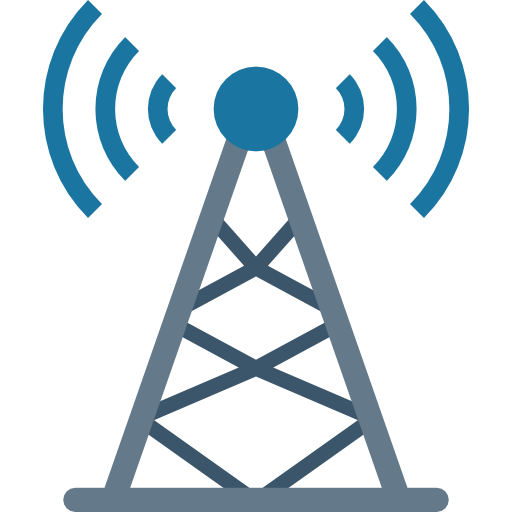

# **TELCO CUSTOMER CHURN ANALYSIS**


## **Problem Statement**:

    Churn, or customer attrition, refers to the likelihood of customers discontinuing a subscription service and choosing a competitor's offering.

    In the telecommunications sector, the threat of customer churn poses a significant risk to the sustainability of businesses.

    This problem statement seeks to provide stakeholders with a comprehensive understanding of customer churn, delving into customer behavior to unravel the intricate factors contributing to attrition.

    The analysis will assess customer interactions, and usage patterns to pinpoint the root causes of churn.

    Stakeholders will acquire practical insights to strategically address customer concerns and adapt services to meet changing consumer needs.

    The objective extends beyond reducing churn rates; it also involves maximizing customer loyalty to establish a robust presence in the competitive telecommunications market.

    By adopting a comprehensive approach, businesses can proactively shape customer experiences, thereby strengthening their market position.

## **Objectives:**


    1. To Predict Customer Churn
    2. Factors Affecting Customer Churn
    3. What are the most proffitable Service type
    4. Amount lost in Revenue as a result of Churning

## **Variable Description**

**Basic Demographics:**

    1. customerID: Unique identifier for each customer.
    2. gender: Customer's gender.
    3. SeniorCitizen: Binary variable indicating whether the customer is a senior citizen (1) or not (0).
    4. Partner: Indicates whether the customer has a partner or not.
    5. Dependents: Indicates whether the customer has dependents or not.


**Services:**

     1. PhoneService: Indicates whether the customer has a phone service or not.

     2. MultipleLines: Categorical variable indicating whether the customer has multiple lines.

     3. InternetService: Categorical variable indicating the type of internet service the customer has.

     4. OnlineSecurity: Categorical variable indicating whether the customer has online security.

    5. OnlineBackup: Categorical variable indicating whether the customer has online backup.

    6. DeviceProtection: Categorical variable indicating whether the customer has device protection.

    7. TechSupport: Categorical variable indicating whether the customer has tech support.

    8. StreamingTV: Categorical variable indicating whether the customer has streaming TV.

    9. StreamingMovies: Categorical variable indicating whether the customer has streaming movies.


**Contract and Billing:**

    1. Contract: Categorical variable indicating the type of contract the customer has.

    2. PaperlessBilling: Indicates whether the customer uses paperless billing (1) or not (0).

    3. PaymentMethod: Categorical variable indicating the type of payment method used by the customer.


  **Churn:**

    1. Churn: Indicates whether the customer churned (Yes-1) or not (No-0).


  **Financial and Usage:**

    1. tenure: The number of months the customer has been with the company (numerical).

    2. MonthlyCharges: The amount charged to the customer per month (numerical).

    3. TotalCharges: The total amount charged to the customer over the entire tenure (numerical).

# **Libraries**

## Installing Libraries

In [1]:
!pip install pandas

In [2]:
!pip install kaggle

# The library allows one to interact with Kaggle datasets, competitions, and other features directly from Python environment.

## Importing Libraries

In [3]:
import zipfile           ## works with ZIP archives, allowing extraction of data from compressed files.

import os                ## Enables interaction with the operating system, providing functions for file and directory manipulation.

import pandas as pd      ## data manipulation and analysis, particularly with structured data using DataFrame structures.

import numpy as np

import locale            # Comma Style (Formarts with a thousand seperator)

import seaborn as sns

import matplotlib.pyplot as plt

# **Extracing Data (Kaggle)**

In [4]:
# Kaggle library

!pip install kaggle

In [5]:
# Uploading Kaggle API Keys

from google.colab import files

uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [6]:
# Moving the uploaded kaggle json file (Kaggle API key) to the correct directory:

!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json


In [7]:
# Downloading the Dataset from Kaggle link

!kaggle datasets download -d puja19/telcom-customer-churn


  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 80.6MB/s]


In [8]:
# Extracting contents of the zip file to the current directory by unzipping the dataset.

!unzip telcom-customer-churn.zip


Archive:  telcom-customer-churn.zip
  inflating: Telco-Customer-Churn.csv  


In [61]:
import pandas as pd


df = pd.read_csv('Telco-Customer-Churn.csv')


df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



# **Data Cleaning**

In [10]:
df.shape

(7043, 21)

**Displaying Column names**



In [11]:
column_names = df.columns

column_names

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Data Types

In [52]:
data_types = df.dtypes

data_types

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**Data type conversion**

     1) TotalCharges to Float

    Handling Empty Values in the 'TotalCharges' column by replacing them with NaN for smooth numeric operations.

    Convert the 'TotalCharges' column to a numeric data type to ensure consistency for numerical analysis.

    Displaying the updated data types and preview of the DataFrame


In [62]:
df['TotalCharges'] = df['TotalCharges'].replace('', np.nan)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print(df.dtypes)

df.head(5)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Missing Values

**Identifying Missing values**

In [63]:
missing_values = df.isnull().sum()

missing_values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**Handling of missing Values:**

    Given that I've 11 missing values out of 7043 observations, it represents a relatively small proportion of the dataset (less than 0.2%). In such cases, I choose to simply drop the rows containing missing values.



In [65]:

# Drop missing values
df.dropna(inplace=True)

# Check if there are any missing values after dropping
missing_values = df.isnull().sum()
print(missing_values)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


  ### Identifying Duplicate rows

In [16]:
duplicate_rows = df.duplicated()

num_duplicates = duplicate_rows.sum()

print("Number of duplicate rows:", num_duplicates)


Number of duplicate rows: 0


## Distribution of Variables

    After checking Data Types of variables, I've separated the variables to identify potential categorical and numberical variables.

         Categorical Variables: Objects
         Numerical Variables:  int64, float64

**Distribution of Categorical Variables**

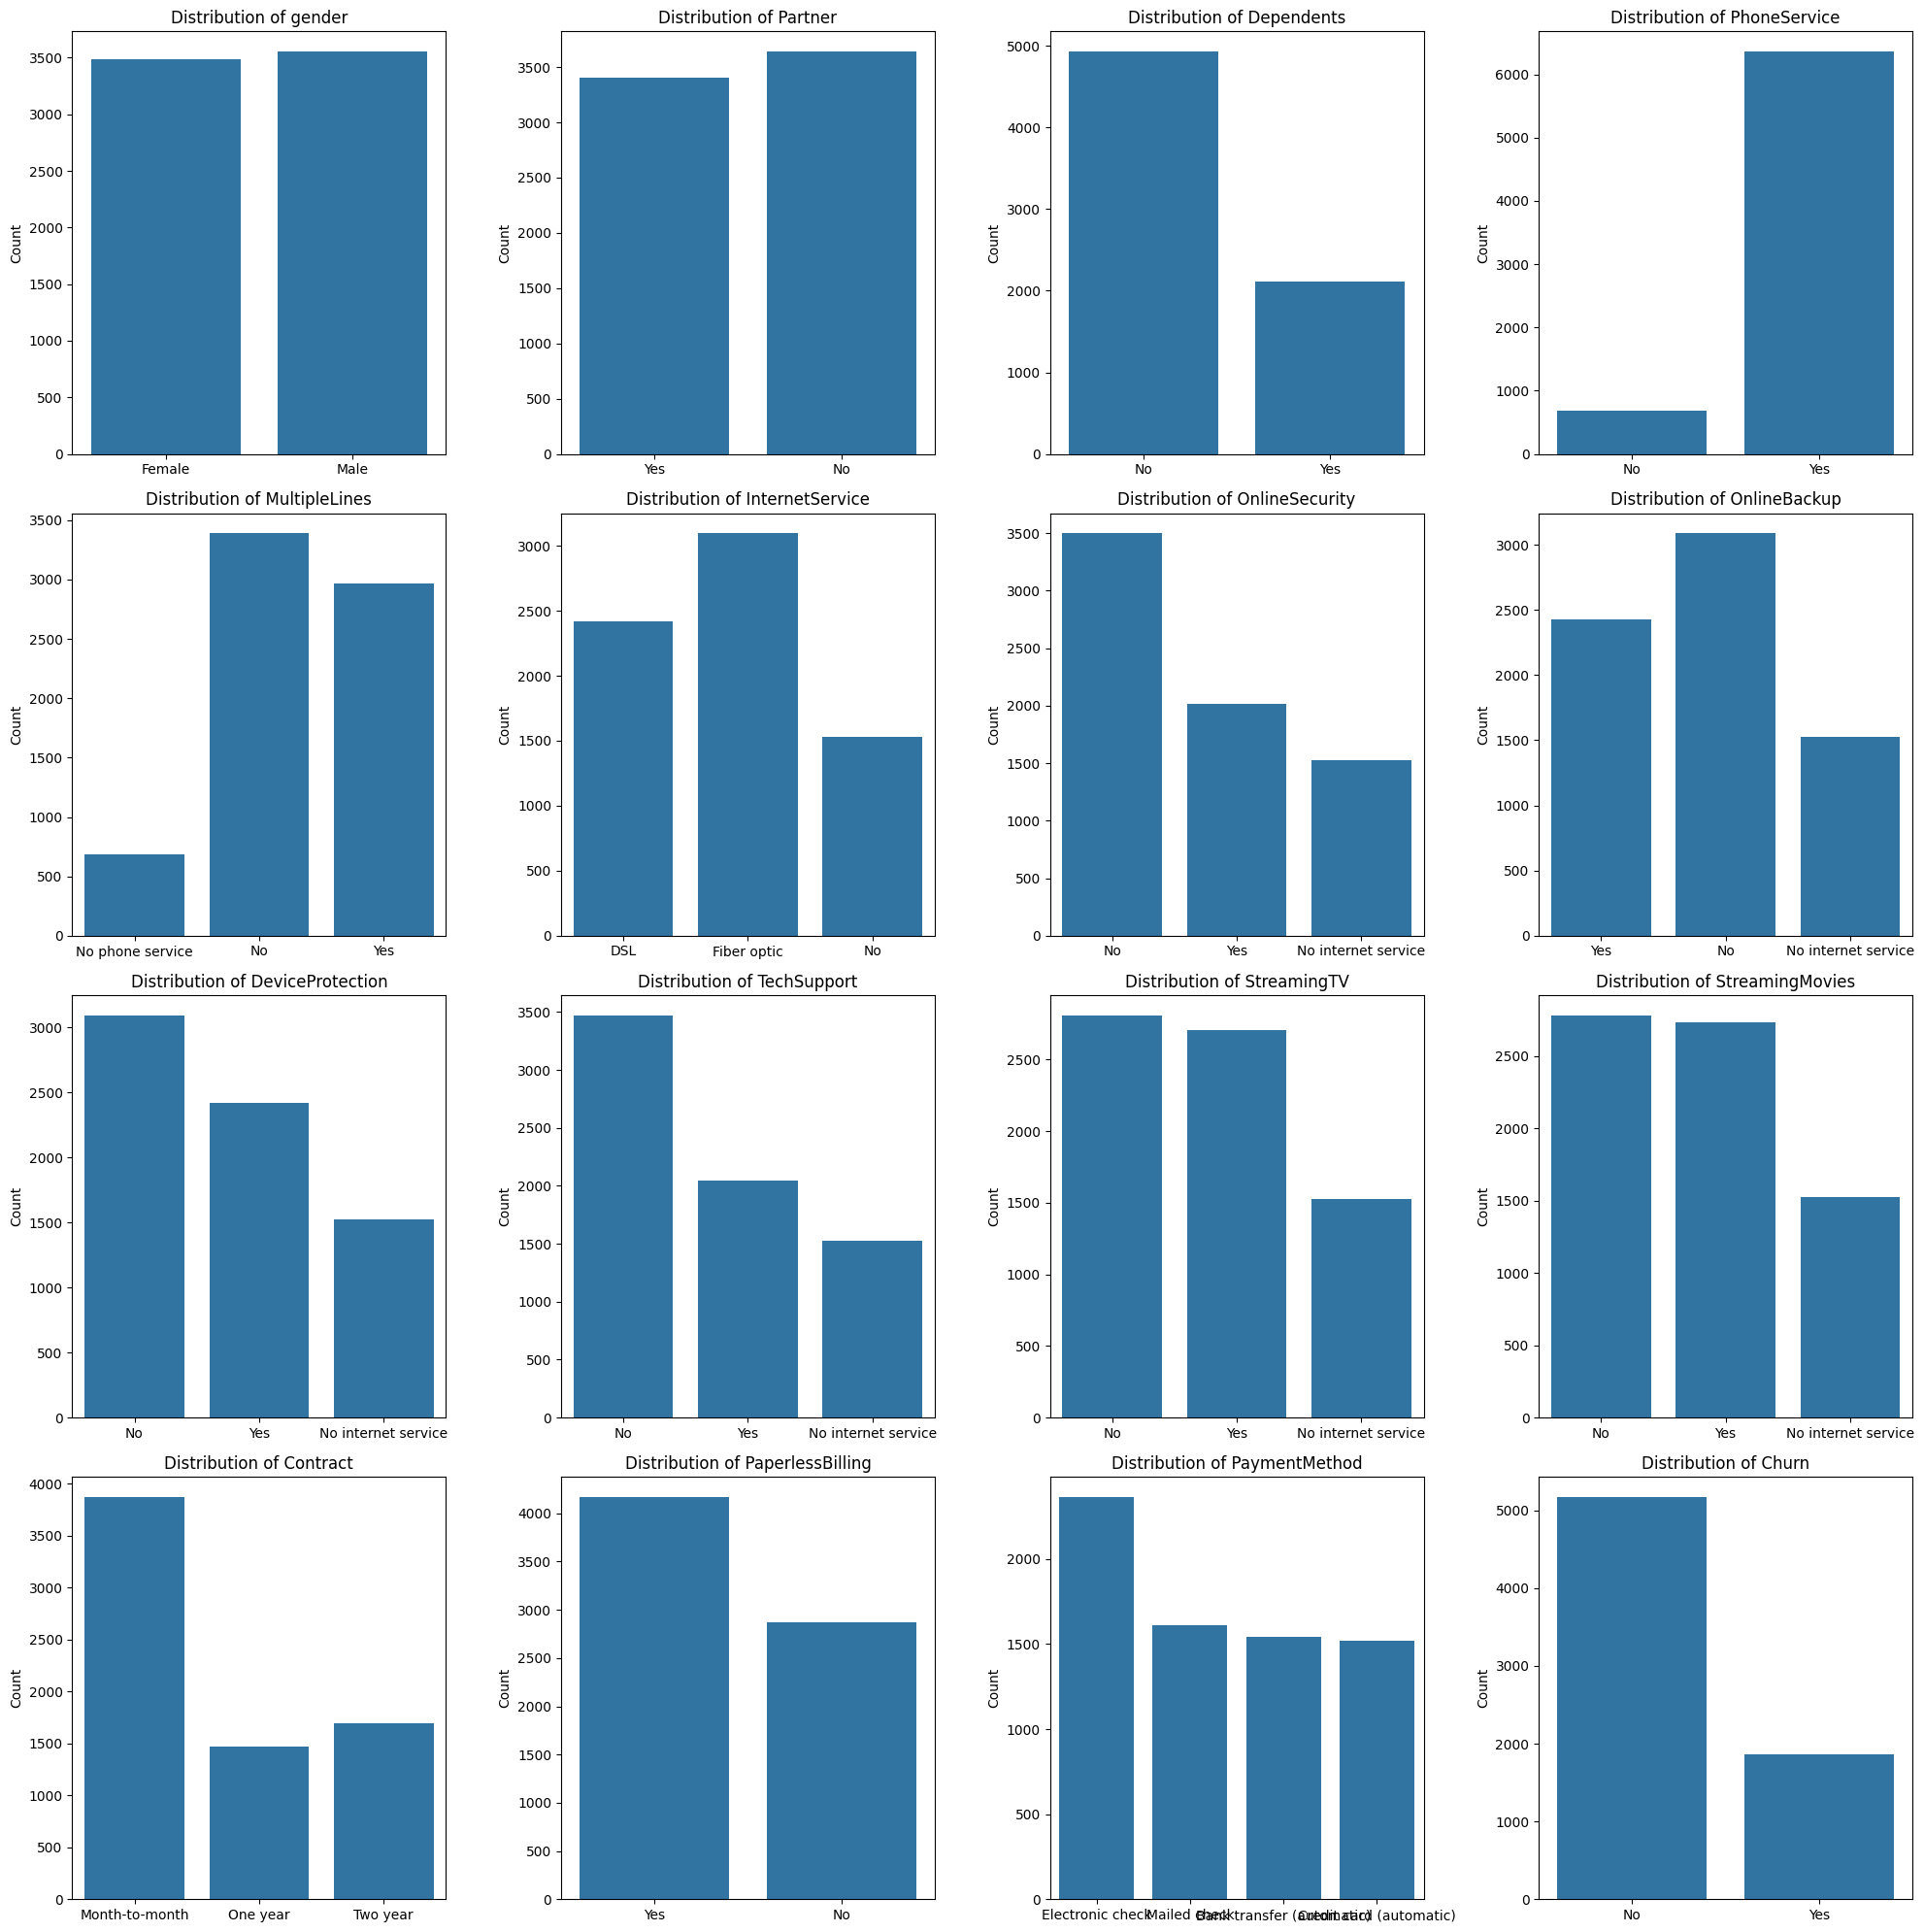

In [17]:
import matplotlib.pyplot as plt

import seaborn as sns

# categorical variables

categorical_variables = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Subplots

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

# Flattenning axes array

axes = axes.flatten()

# Exploring distribution of categorical variables

for i, var in enumerate(categorical_variables):

    sns.countplot(data=df, x=var, ax=axes[i])

    axes[i].set_title(f'Distribution of {var}')

    axes[i].set_xlabel('')

    axes[i].set_ylabel('Count')

# Adjusting layout

plt.tight_layout()

plt.show()



**Distribution of Numerical Variables**

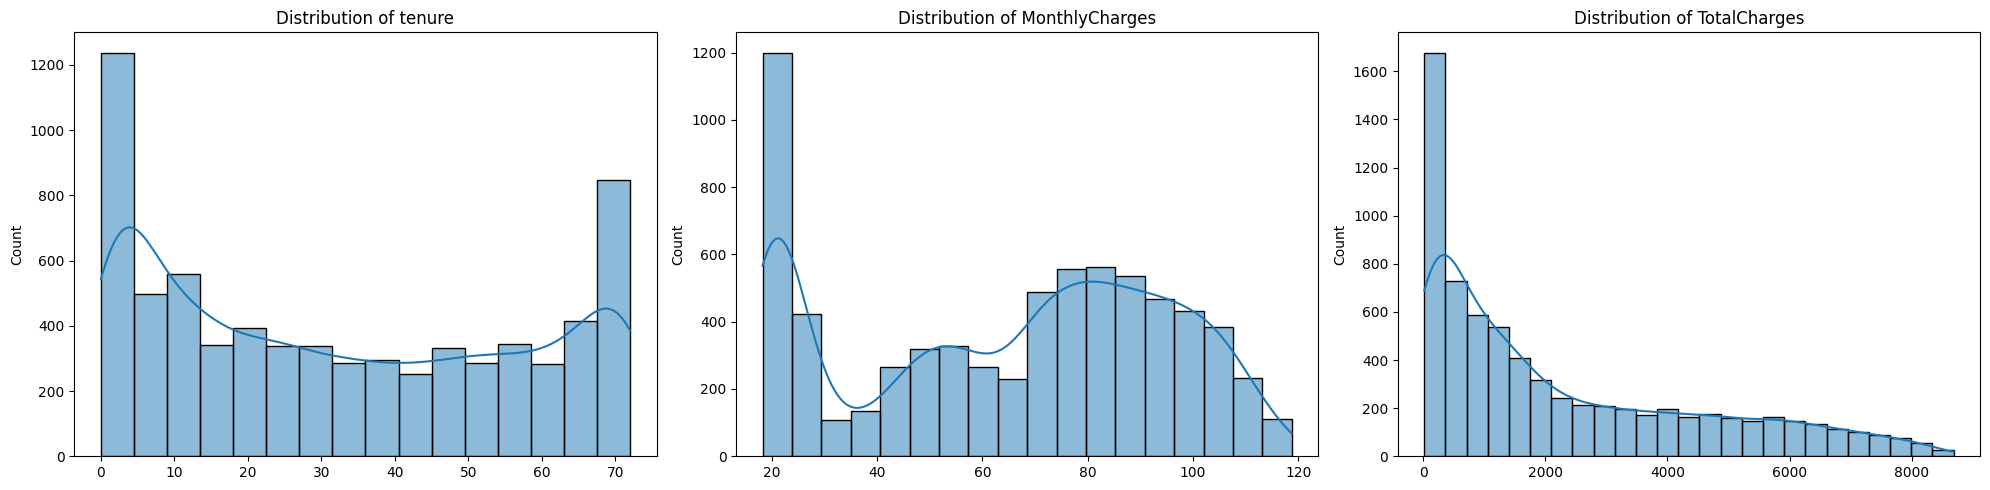

In [18]:
import matplotlib.pyplot as plt

import seaborn as sns

# numerical variables

numerical_variables = [

    'tenure', 'MonthlyCharges', 'TotalCharges'

]

# Subplots

fig, axes = plt.subplots(nrows=1, ncols=len(numerical_variables), figsize=(20, 5))

# Handling one numerical variable separately to avoid issues with indexing

if len(numerical_variables) == 1:
    sns.histplot(data=df, x=numerical_variables[0], kde=True, ax=axes)
    axes.set_title(f'Distribution of {numerical_variables[0]}')
    axes.set_xlabel('')
    axes.set_ylabel('Count')
else:
    # Flatten the axes array if there are multiple numerical variables

    axes = axes.flatten()

    # Explore distribution of numerical variables

    for i, var in enumerate(numerical_variables):
        sns.histplot(data=df, x=var, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {var}')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Count')

# Layout adjustment

plt.tight_layout()

plt.show()


## Correlation

                SeniorCitizen  tenure  MonthlyCharges  TotalCharges
SeniorCitizen            1.00    0.02            0.22          0.10
tenure                   0.02    1.00            0.25          0.83
MonthlyCharges           0.22    0.25            1.00          0.65
TotalCharges             0.10    0.83            0.65          1.00


<ipython-input-19-6014a614547f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


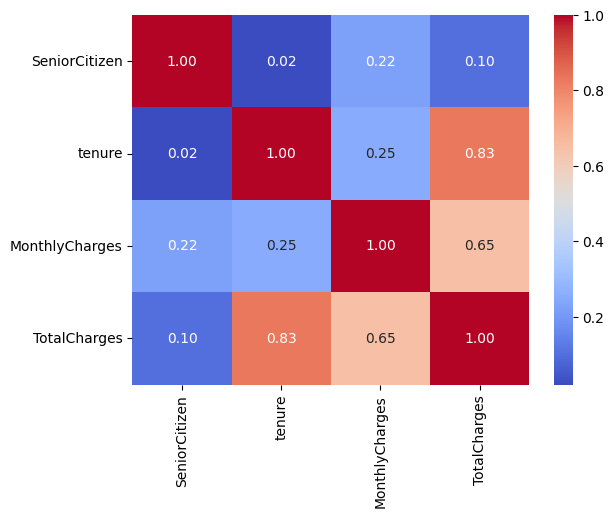

In [19]:

correlation_matrix = df.corr()

# Round off to 2 dp

rounded_correlation_matrix = correlation_matrix.round(2)


print(rounded_correlation_matrix)

# heatmap

sns.heatmap(rounded_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.show()


**SeniorCitizen:**

    Very weak positive correlation with tenure (0.02).

    Weak positive correlation with MonthlyCharges (0.22) and TotalCharges (0.10).

    Senior citizens have slightly higher monthly and total charges.


**Tenure:**

    Weak positive correlation with MonthlyCharges (0.25).

    Strong positive correlation with TotalCharges (0.83).

    longer-tenured customers tend to have higher total charges.


**MonthlyCharges:**

    Weak positive correlation with SeniorCitizen (0.22) and tenure (0.25).

    Moderately strong positive correlation with TotalCharges (0.65).

    Customers with higher monthly charges tend to have higher total charges.


**TotalCharges:**

    Weak positive correlation with SeniorCitizen (0.10)and MonthlyCharges (0.65).

    Strong positive correlation with tenure (0.83).

    Total charges are strongly influenced by customer tenure.

## Skewness and Kurtosis

In [20]:
# Skewness and kurtosis Calculation for numerical variables
numerical_skewness = df.skew()
numerical_kurtosis = df.kurtosis()

# storing skewness and kurtosis values
statistics_df = pd.DataFrame({'Skewness': numerical_skewness, 'Kurtosis': numerical_kurtosis})

print(statistics_df)


                Skewness  Kurtosis
SeniorCitizen   1.833633  1.362596
tenure          0.239540 -1.387372
MonthlyCharges -0.220524 -1.257260
TotalCharges    0.961642 -0.231799


<ipython-input-20-94caa53d412a>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  numerical_skewness = df.skew()
<ipython-input-20-94caa53d412a>:3: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  numerical_kurtosis = df.kurtosis()


      Skewness measures the asymmetry of the distribution.
      Kurtosis measures the peakedness or flatness of the distribution relative to a normal distribution.
      A positive skewness (Value greater than 0) indicates that the distribution is skewed to the right (Longer tail on the right side), meaning there may be more data points on the left and fewer on the right.
      A positive kurtosis (value greater than 0) indicates a distribution with a sharper peak (more outliers in the tails) compared to a normal distribution.


**SeniorCitizen:**

    Skewness: 1.833633 (The distribution is right-skewed)
    Kurtosis: 1.362596 (moderately peaked distribution.)
  

**Tenure:**

    Skewness: 0.239540 (value is close to zero, indicating that the distribution is approximately symmetric.)
    Kurtosis: -1.387372 ( -ve value suggests that the distribution is platykurtic, meaning it is less peaked and has thinner tails than a normal distribution)


**MonthlyCharges:**

    Skewness: -0.220524 (-ve value indicates the distribution is slightly left-skewed.)
    Kurtosis: -1.257260 (-ve value suggests that the distribution is platykurtic just like tenure).

    
**TotalCharges:**

    Skewness: 0.961642 (+ve value indicates that the distribution is right-skewed.)
    Kurtosis: -0.231799 (-ve value suggests that the distribution is platykurtic, but less than that of tenure and MonthlyCharges)


## Encoding Categorical Variable

**Unique Observations in each variable**

In [56]:
variable_info = pd.DataFrame(columns=['Variable', 'Unique_Values'])

# storing individual df

dfs = []

for column in df.columns:

    unique_values = df[column].unique()

    # Append individual df

    dfs.append(pd.DataFrame({'Variable': [column], 'Unique_Values': [unique_values]}))

# Concatenate the list of Df

variable_info = pd.concat(dfs, ignore_index=True)


variable_info


,Variable,Unique_Values
0,customerID,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC..."
1,gender,"[Female, Male]"
2,SeniorCitizen,"[0, 1]"
3,Partner,"[Yes, No]"
4,Dependents,"[No, Yes]"
5,tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ..."
6,PhoneService,"[No, Yes]"
7,MultipleLines,"[No phone service, No, Yes]"
8,InternetService,"[DSL, Fiber optic, No]"
9,OnlineSecurity,"[No, Yes, No internet service]"


**Label Mapping**

In [66]:
# label mappings for each variable using Dictionaries

label_mappings = {
    'gender': {'Male': 0, 'Female': 1},
    'Partner': {'No': 0, 'Yes': 1},
    'Dependents': {'No': 0, 'Yes': 1},
    'PhoneService': {'No': 0, 'Yes': 1},
    'MultipleLines': {'No phone service': 0, 'No': 1, 'Yes': 2},
    'InternetService': {'DSL': 0, 'Fiber optic': 1, 'No': 2},
    'OnlineSecurity': {'No': 0, 'Yes': 1, 'No internet service': 2},
    'OnlineBackup': {'No': 0, 'Yes': 1, 'No internet service': 2},
    'DeviceProtection': {'No': 0, 'Yes': 1, 'No internet service': 2},
    'TechSupport': {'No': 0, 'Yes': 1, 'No internet service': 2},
    'StreamingTV': {'No': 0, 'Yes': 1, 'No internet service': 2},
    'StreamingMovies': {'No': 0, 'Yes': 1, 'No internet service': 2},
    'Contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2},
    'PaperlessBilling': {'No': 0, 'Yes': 1},
    'PaymentMethod': {
        'Electronic check': 0,
        'Mailed check': 1,
        'Bank transfer (automatic)': 2,
        'Credit card (automatic)': 3
    },
    'Churn': {'No': 0, 'Yes': 1}
}

# Applying label mapping (
    # map() function replaces original values in the DF with the specified labels

for column, mapping in label_mappings.items():
    df[column] = df[column].map(mapping)


df.head(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,1,0,1,...,1,0,0,0,1,0,1,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,1,0,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,0,0,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,1,1,0,...,0,0,0,0,0,1,0,70.70,151.65,1


## Descriptive statistics

In [23]:
df.describe().round(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.0,7043.00,7043.00,7043.00,7043.00,7043.0,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7032.00,7043.00
mean,0.5,0.16,0.48,0.30,32.37,0.9,1.33,0.87,0.72,0.78,0.78,0.72,0.82,0.82,0.69,0.59,1.32,64.76,2283.30,0.27
std,0.5,0.37,0.50,0.46,24.56,0.3,0.64,0.74,0.80,0.78,0.78,0.80,0.76,0.76,0.83,0.49,1.15,30.09,2266.77,0.44
min,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.25,18.80,0.00
25%,0.0,0.00,0.00,0.00,9.00,1.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,35.50,401.45,0.00
50%,0.0,0.00,0.00,0.00,29.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,70.35,1397.48,0.00
75%,1.0,0.00,1.00,1.00,55.00,1.0,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,89.85,3794.74,1.00
max,1.0,1.00,1.00,1.00,72.00,1.0,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,118.75,8684.80,1.00


**Key insights based on Descriptive statistics:**

- There're approximately equal distribution between genders (mean: 0.5).

- A relatively small percentage (16%) of customers are senior citizens (mean: 0.16).

- About 48% of customers have a partner, and 30% have dependents which provides insights into family structure.
  
- The average customer tenure is approximately 32.37 months, with a wide range (min: 0, max: 72).

- The majority (90%) of customers have phone service.
   
- On average, customers have 1.33 lines, with some having multiple lines.

- Most customers (87%) have internet service.

- These services (Online Security, Backup, Device Protection, Tech Support, Streaming) are generally subscribed to by a significant portion of customers (mean around 0.72 to 0.82).
   
- Customers have varying contract terms, with a mix of month-to-month, one-year, and two-year contracts.

- 59% of customers opt for paperless billing.
    
- Diverse payment methods, with a mean of 1.32, indicating multiple methods being used.
    
- The average monthly charge is 64.76, with a wide range (min: 18.25, max: 118.75).

- The churn rate is approximately 27%, suggesting a significant proportion of customers discontinuing the service.

# **CHURN ANALYSIS**

## Churn Distribution

    Indicates whether the customer churned (Yes-1) or not (No-0).

    Churn variable (Target variable / Dependent Variable)

<ipython-input-24-1cab17b8e983>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette=['skyblue', 'pink'], ax=axes[0])


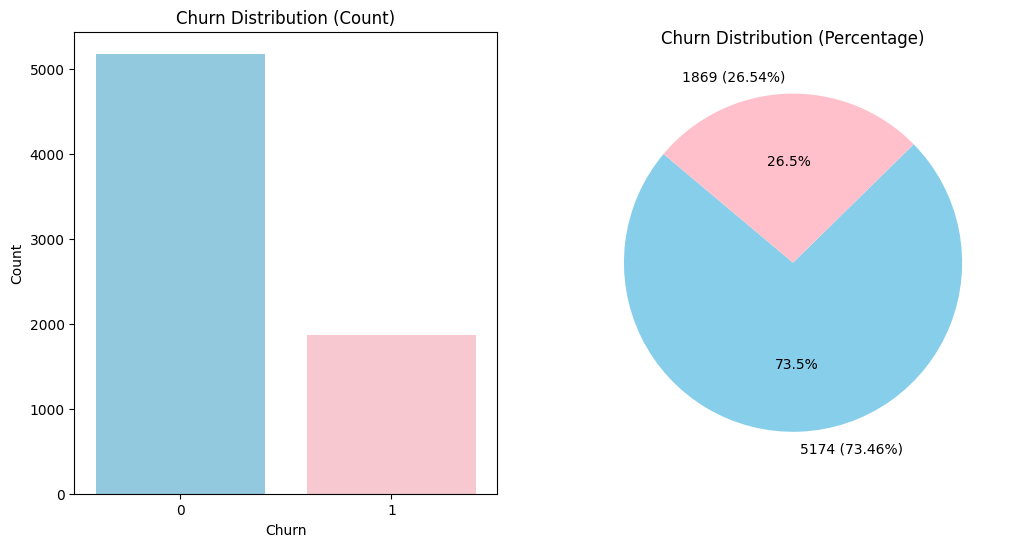

In [24]:
# Churn counts and percentages

churn_counts = df['Churn'].value_counts()

churn_percentage = (df['Churn'].value_counts(normalize=True) * 100).round(2)


churn_data = pd.DataFrame({'Churn Count': churn_counts, 'Churn Percentage': churn_percentage})

churn_data


# Subplots for count and percentage

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart

sns.countplot(x='Churn', data=df, palette=['skyblue', 'pink'], ax=axes[0])
axes[0].set_title('Churn Distribution (Count)')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Count')

axes[1].pie(churn_counts, labels=[f'{count} ({percentage}%)' for count, percentage in zip(churn_counts, churn_percentage)], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'pink'])
axes[1].set_title('Churn Distribution (Percentage)')

plt.show()


**Relationship between Churn and Other Variables(Correlation Analysis)**

In [25]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Correlation with churn variable
churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)

churn_correlation

<ipython-input-25-ba24a1a99885>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
MultipleLines       0.036310
PhoneService        0.011942
gender              0.008612
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
TotalCharges       -0.199484
StreamingTV        -0.205742
StreamingMovies    -0.207256
PaymentMethod      -0.262818
DeviceProtection   -0.281465
OnlineBackup       -0.291449
TechSupport        -0.329852
OnlineSecurity     -0.332819
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

## Churn Rate by segments

### Demographic

Distibution of Demographic variables for Churning


Churn Rate by gender:
Churn   Churn No (%)  Churn Yes (%)
gender                             
Female         73.08          26.92
Male           73.84          26.16

Churn Rate by Partner:
Churn    Churn No (%)  Churn Yes (%)
Partner                             
0               67.04          32.96
1               80.34          19.66

Churn Rate by SeniorCitizen:
Churn          Churn No (%)  Churn Yes (%)
SeniorCitizen                             
Old People            58.32          41.68
Young People          76.39          23.61

Churn Rate by Dependents:
Churn       Churn No (%)  Churn Yes (%)
Dependents                             
0                  68.72          31.28
1                  84.55          15.45


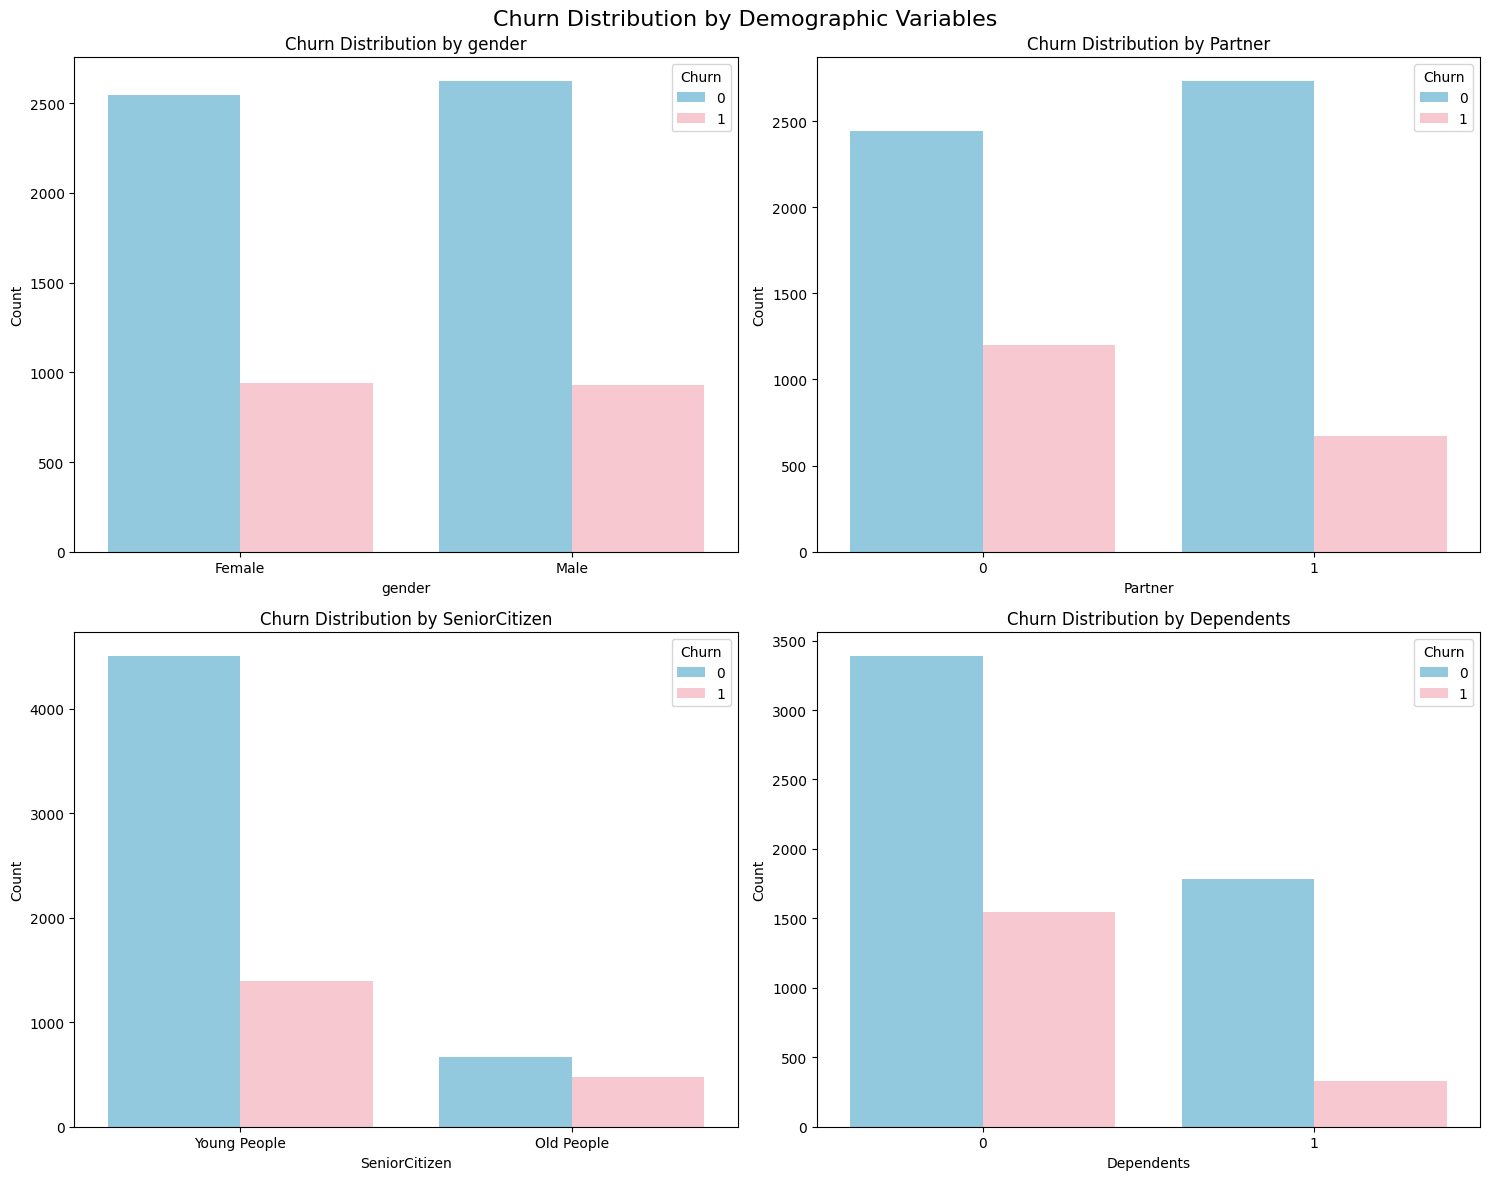

In [27]:
# Renaming gender and senior citizen

df['gender'] = df['gender'].replace({0: 'Male', 1: 'Female'})
df['SeniorCitizen'] = df['SeniorCitizen'].replace({0: 'Young People', 1: 'Old People'})

# Demographic variables
demographic_variables = ['gender', 'Partner', 'SeniorCitizen', 'Dependents']

# Subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
fig.suptitle('Churn Distribution by Demographic Variables', fontsize=16)

# Loop through each demographic variable and plotting churn distribution
for i, var in enumerate(demographic_variables):
    row = i // 2
    col = i % 2
    ax = axes[row][col]
    sns.countplot(x=var, hue='Churn', data=df, palette={'skyblue','pink'}, ax=ax)
    ax.set_title(f'Churn Distribution by {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')
    ax.legend(title='Churn', loc='upper right')

    # Churn rate
    churn_rate = (df.groupby(var)['Churn'].value_counts(normalize=True) * 100).unstack().round(2)
    churn_rate = churn_rate.rename(columns={0: 'Churn No (%)', 1: 'Churn Yes (%)'})
    print(f"\nChurn Rate by {var}:")
    print(churn_rate)

plt.tight_layout()
plt.show()


<ipython-input-26-f68127a63803>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(sorted_churn_rates.keys()), y=list(sorted_churn_rates.values()), palette="BuPu", ax=ax)


Average churn rate for Gender: 26.54%
Average churn rate for SeniorCitizen: 32.64%
Average churn rate for Partner: 26.31%
Average churn rate for Dependents: 23.36%


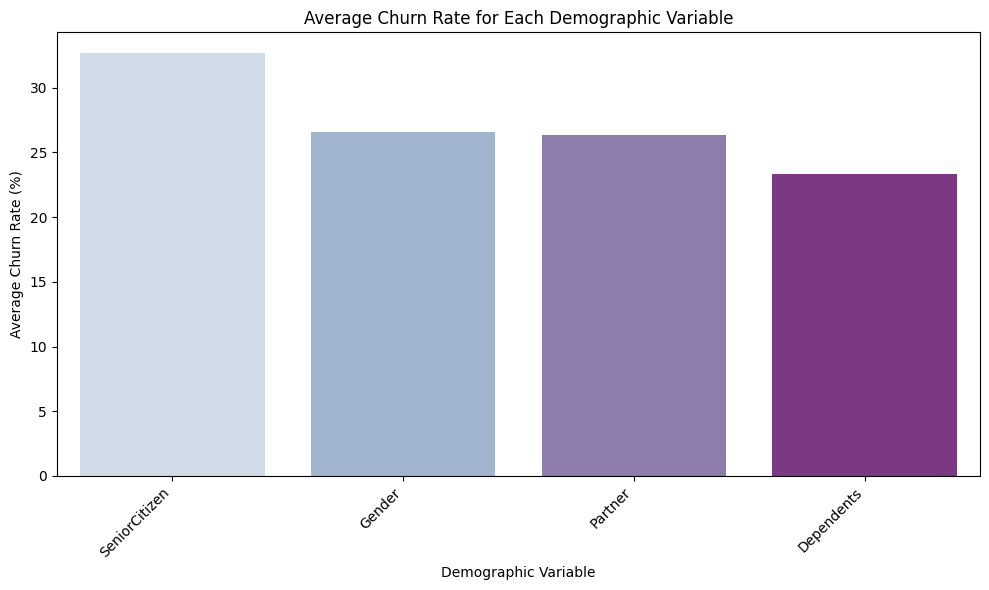

In [26]:
# Average churn rate for each demographic variable
average_churn_rates = {}

# Gender Churn rate
gender_churn_rates = df.groupby('gender')['Churn'].mean()
average_churn_rates['Gender'] = round(gender_churn_rates.mean() * 100, 2)

# Senior citizen Churn rate
senior_churn_rates = df.groupby('SeniorCitizen')['Churn'].mean()
average_churn_rates['SeniorCitizen'] = round(senior_churn_rates.mean() * 100, 2)

# Partner churn
partner_churn_rates = df.groupby('Partner')['Churn'].mean()
average_churn_rates['Partner'] = round(partner_churn_rates.mean() * 100, 2)

# Dependents churn rate
dependents_churn_rates = df.groupby('Dependents')['Churn'].mean()
average_churn_rates['Dependents'] = round(dependents_churn_rates.mean() * 100, 2)

for demographic_var, churn_rate in average_churn_rates.items():
    print(f"Average churn rate for {demographic_var}: {churn_rate}%")

# Sort average churn rates from largest to smallest
sorted_churn_rates = dict(sorted(average_churn_rates.items(), key=lambda item: item[1], reverse=True))

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot average churn rates for each demographic
sns.barplot(x=list(sorted_churn_rates.keys()), y=list(sorted_churn_rates.values()), palette="BuPu", ax=ax)

# Set title and labels
ax.set_title('Average Churn Rate for Each Demographic Variable')
ax.set_xlabel('Demographic Variable')
ax.set_ylabel('Average Churn Rate (%)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


### Services Provided

Distribution of services by churning


Churn Rate by PhoneService:
Churn         Churn No (%)  Churn Yes (%)
PhoneService                             
0                    75.00          25.00
1                    73.25          26.75

Churn Rate by MultipleLines:
Churn          Churn No (%)  Churn Yes (%)
MultipleLines                             
0                     75.00          25.00
1                     74.92          25.08
2                     71.35          28.65

Churn Rate by InternetService:
Churn            Churn No (%)  Churn Yes (%)
InternetService                             
0                       81.00          19.00
1                       58.11          41.89
2                       92.57           7.43

Churn Rate by OnlineSecurity:
Churn           Churn No (%)  Churn Yes (%)
OnlineSecurity                             
0                      58.22          41.78
1                      85.36          14.64
2                      92.57           7.43

Churn Rate by OnlineBackup:
Churn         Churn N

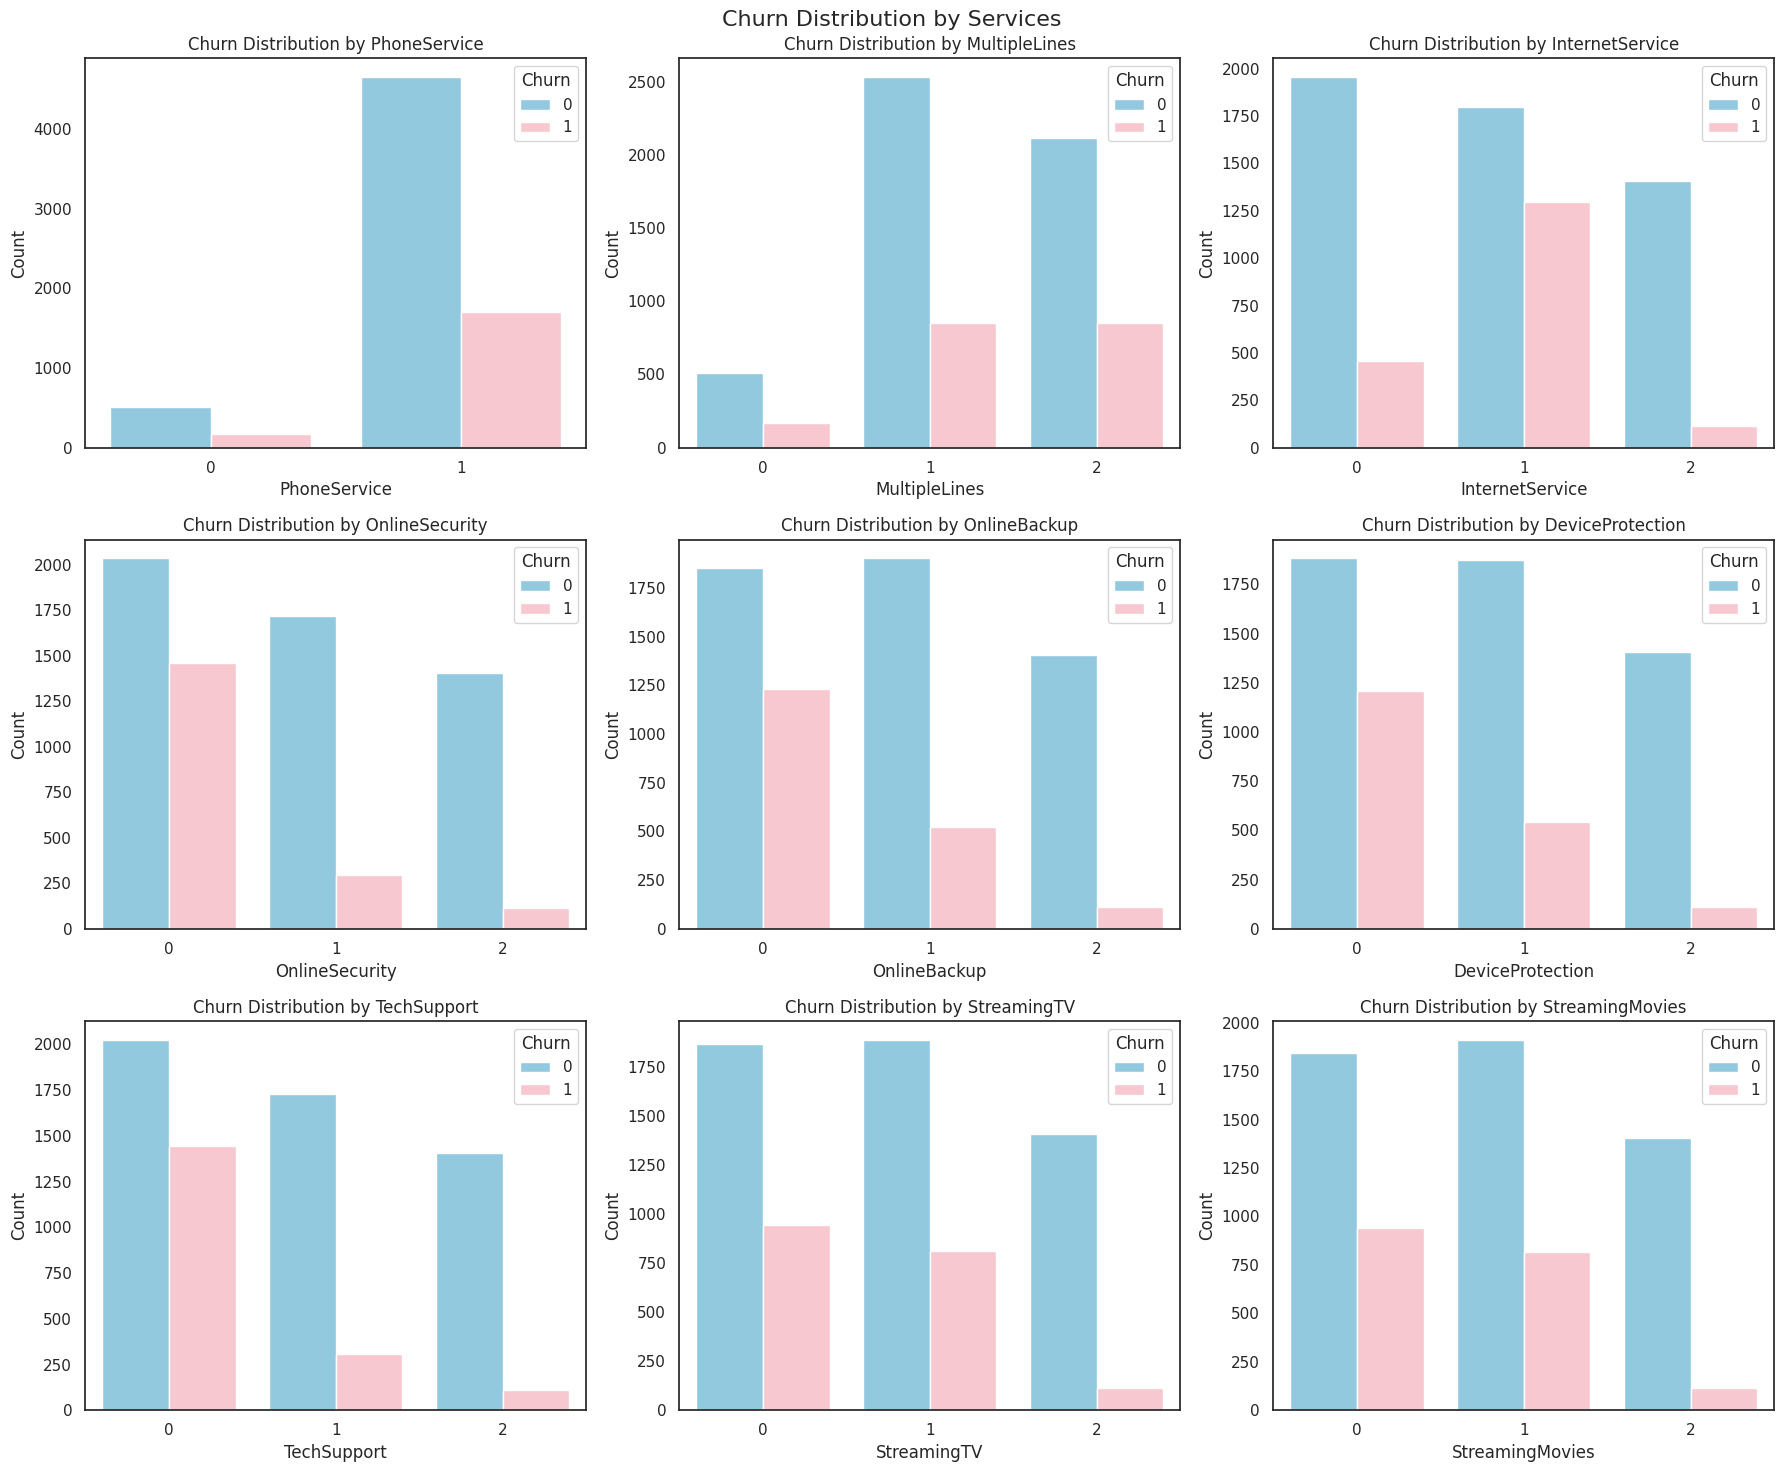

In [91]:
# List of services
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies']

# Subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
fig.suptitle('Churn Distribution by Services', fontsize=16)

# Loop through each service variable and plotting churn distribution
for i, service in enumerate(services):
    row = i // 3
    col = i % 3
    ax = axes[row][col]
    sns.countplot(x=service, hue='Churn', data=df, palette={'skyblue','pink'}, ax=ax)
    ax.set_title(f'Churn Distribution by {service}')
    ax.set_xlabel(service)
    ax.set_ylabel('Count')
    ax.legend(title='Churn', loc='upper right')

    # Churn rate
    churn_rate = (df.groupby(service)['Churn'].value_counts(normalize=True) * 100).unstack().round(2)
    churn_rate = churn_rate.rename(columns={0: 'Churn No (%)', 1: 'Churn Yes (%)'})
    print(f"\nChurn Rate by {service}:")
    print(churn_rate)

plt.tight_layout()
plt.show()


Average churn rate for OnlineSecurity: 21.26%
Average churn rate for OnlineBackup: 22.96%
Average churn rate for DeviceProtection: 23.01%
Average churn rate for TechSupport: 21.4%
Average churn rate for StreamingTV: 23.67%
Average churn rate for StreamingMovies: 23.68%
Average churn rate for PhoneService: 25.82%
Average churn rate for MultipleLines: 26.19%
Average churn rate for InternetService: 22.75%


<ipython-input-28-b725657614ee>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(sorted_churn_rates.keys()), y=list(sorted_churn_rates.values()), palette="BuPu", ax=ax)


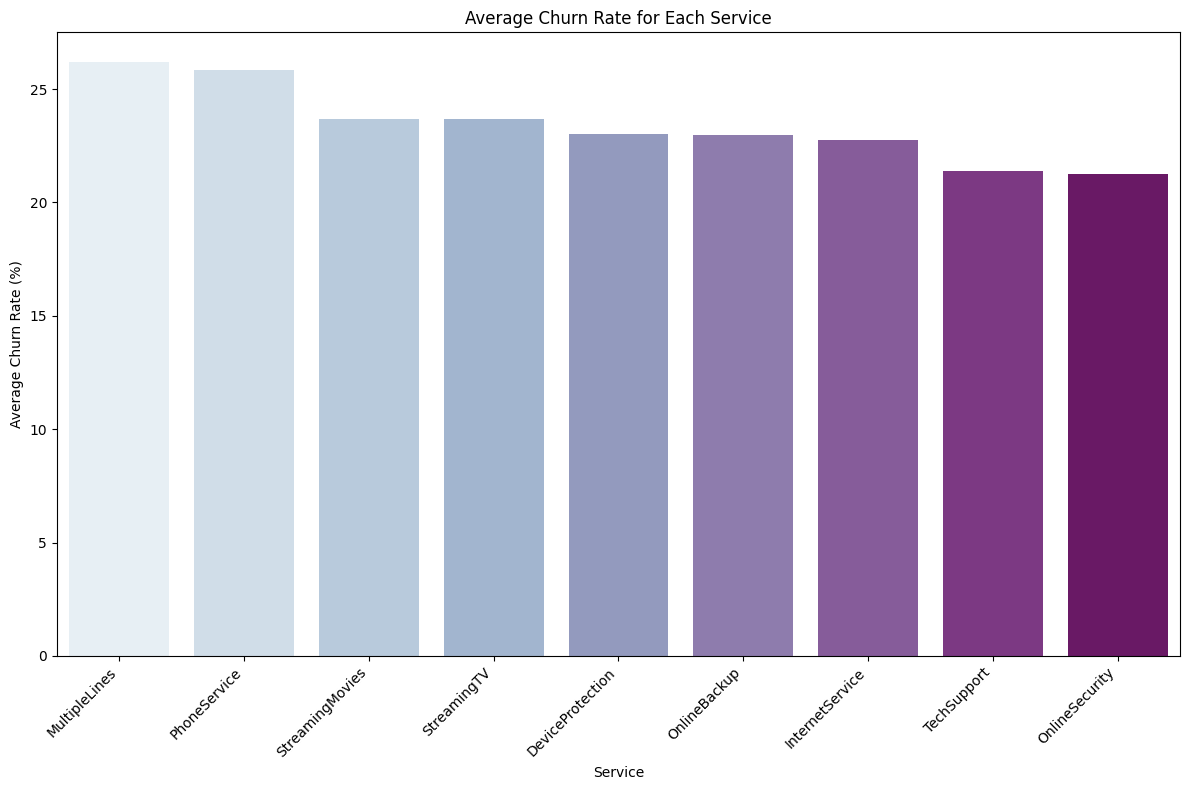

In [28]:
# Average churn rate for each service
average_churn_rates = {}

# Loop through each service
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'PhoneService', 'MultipleLines', 'InternetService']

for service in services:
    service_churn_rates = df.groupby(service)['Churn'].mean()
    average_churn_rates[service] = round(service_churn_rates.mean() * 100, 2)

# Print average churn rates for each service
for service, churn_rate in average_churn_rates.items():
    print(f"Average churn rate for {service}: {churn_rate}%")

# Sort average churn rates from largest to smallest
sorted_churn_rates = dict(sorted(average_churn_rates.items(), key=lambda item: item[1], reverse=True))

# Subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Plot average churn rates for each service
sns.barplot(x=list(sorted_churn_rates.keys()), y=list(sorted_churn_rates.values()), palette="BuPu", ax=ax)


ax.set_title('Average Churn Rate for Each Service')
ax.set_xlabel('Service')
ax.set_ylabel('Average Churn Rate (%)')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()



Churn Rate by PhoneService:
Churn         Churn No (%)  Churn Yes (%)
PhoneService                             
0                    75.07          24.93
1                    73.29          26.71

Churn Rate by MultipleLines:
Churn          Churn No (%)  Churn Yes (%)
MultipleLines                             
0                     75.07          24.93
1                     74.96          25.04
2                     71.39          28.61

Churn Rate by InternetService:
Churn            Churn No (%)  Churn Yes (%)
InternetService                             
0                       81.04          18.96
1                       58.11          41.89
2                       92.60           7.40

Churn Rate by OnlineSecurity:
Churn           Churn No (%)  Churn Yes (%)
OnlineSecurity                             
0                      58.23          41.77
1                      85.39          14.61
2                      92.60           7.40

Churn Rate by OnlineBackup:
Churn         Churn N

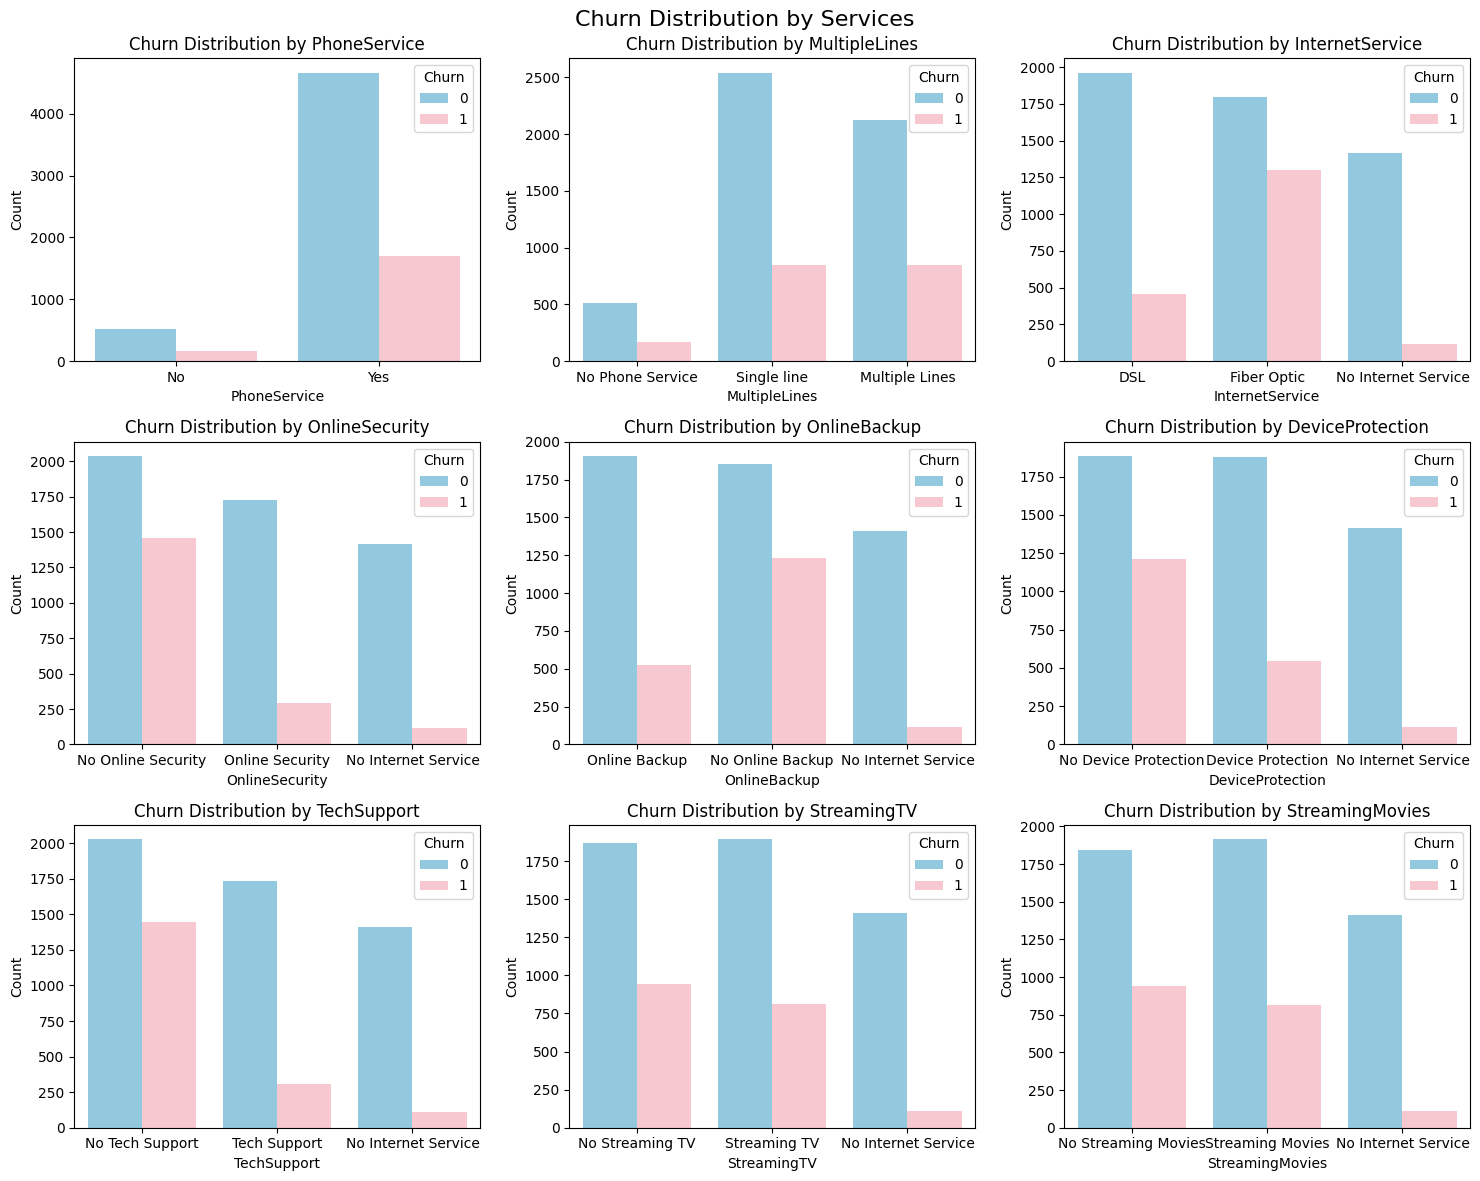

In [29]:
# Mapping for service renaming
service_mapping = {
    'PhoneService': {0: 'No', 1: 'Yes'},
    'MultipleLines': {0: 'No Phone Service', 1: 'Single line', 2: 'Multiple Lines'},
    'InternetService': {0: 'DSL', 1: 'Fiber Optic', 2: 'No Internet Service'},
    'OnlineSecurity': {0: 'No Online Security', 1: 'Online Security', 2: 'No Internet Service'},
    'OnlineBackup': {0: 'No Online Backup', 1: 'Online Backup', 2: 'No Internet Service'},
    'DeviceProtection': {0: 'No Device Protection', 1: 'Device Protection', 2: 'No Internet Service'},
    'TechSupport': {0: 'No Tech Support', 1: 'Tech Support', 2: 'No Internet Service'},
    'StreamingTV': {0: 'No Streaming TV', 1: 'Streaming TV', 2: 'No Internet Service'},
    'StreamingMovies': {0: 'No Streaming Movies', 1: 'Streaming Movies', 2: 'No Internet Service'}
}

# Services provided
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle('Churn Distribution by Services', fontsize=16)

# Loop through each service and plot churn distribution
for i, service in enumerate(services):
    row = i // 3
    col = i % 3
    ax = axes[row][col]

    # Rename service categories using mapping
    df_service = df.replace({service: service_mapping[service]})

    sns.countplot(x=service, hue='Churn', data=df_service, palette={'skyblue', 'pink'}, ax=ax)
    ax.set_title(f'Churn Distribution by {service}')
    ax.set_xlabel(service)
    ax.set_ylabel('Count')
    ax.legend(title='Churn', loc='upper right')

    # Churn rate
    churn_rate = (df.groupby(service)['Churn'].value_counts(normalize=True) * 100).unstack().round(2)
    churn_rate = churn_rate.rename(columns={0: 'Churn No (%)', 1: 'Churn Yes (%)'})
    print(f"\nChurn Rate by {service}:")
    print(churn_rate)

plt.tight_layout()
plt.show()


### Contract and Billing

Distribution of Billing variable for churning


Churn Rate by Contract:
Churn           Churn No (%)  Churn Yes (%)
Contract                                   
Month-to-month         57.29          42.71
One year               88.72          11.28
Two year               97.15           2.85

Churn Rate by PaperlessBilling:
Churn             Churn No (%)  Churn Yes (%)
PaperlessBilling                             
0                        83.62          16.38
1                        66.41          33.59

Churn Rate by PaymentMethod:
Churn                      Churn No (%)  Churn Yes (%)
PaymentMethod                                         
Bank Transfer (Automatic)         83.27          16.73
Credit Card (Automatic)           84.75          15.25
Electronic Check                  54.71          45.29
Mailed Check                      80.80          19.20


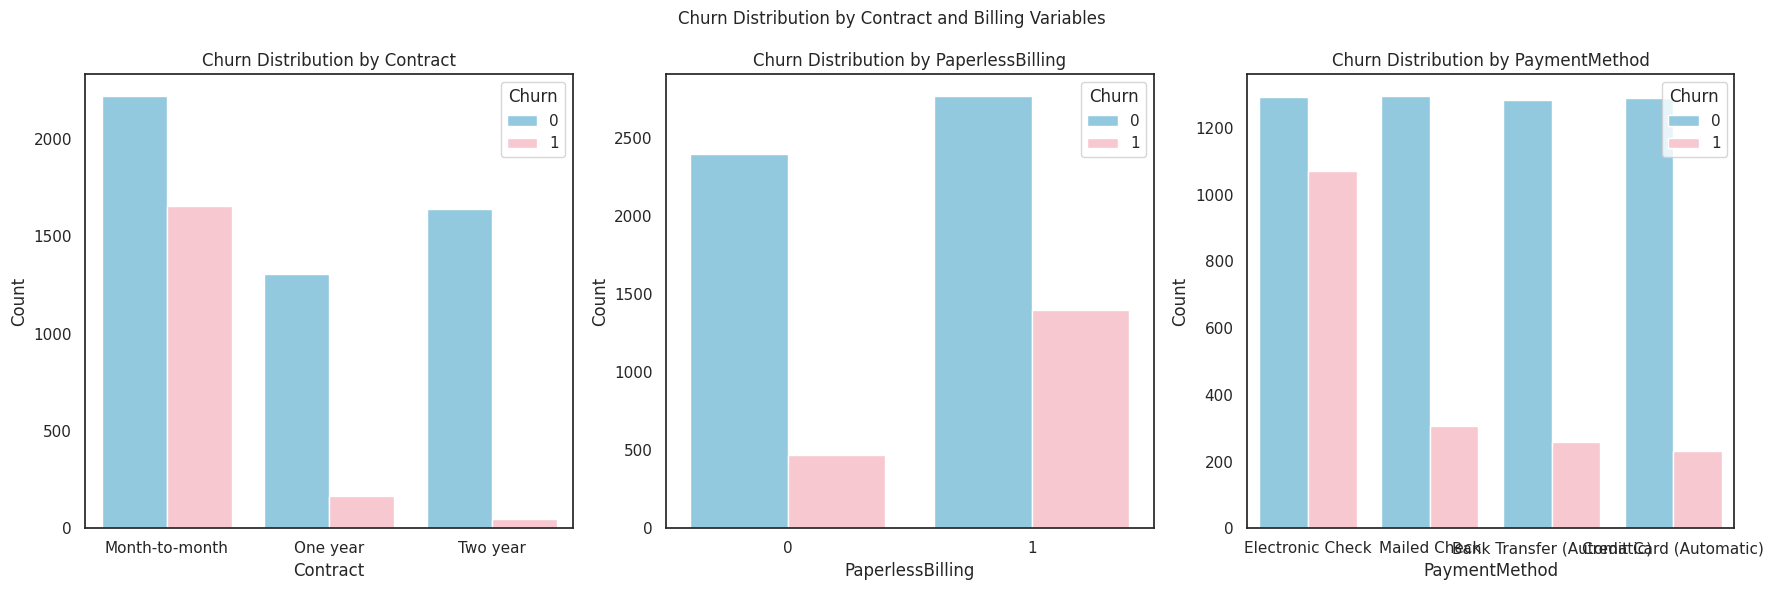

In [95]:
# Variables for contract and billing
billing_variables = ['Contract', 'PaperlessBilling', 'PaymentMethod']

# Subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.suptitle('Churn Distribution by Contract and Billing Variables', fontsize=12)

# Loop through each billing variable and plot churn distribution
for i, var in enumerate(billing_variables):
    ax = axes[i]
    sns.countplot(x=var, hue='Churn', data=df, palette={'skyblue','pink'}, ax=ax)
    ax.set_title(f'Churn Distribution by {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')
    ax.legend(title='Churn', loc='upper right')

    # Churn rate
    churn_rate = (df.groupby(var)['Churn'].value_counts(normalize=True) * 100).unstack().round(2)
    churn_rate = churn_rate.rename(columns={0: 'Churn No (%)', 1: 'Churn Yes (%)'})
    print(f"\nChurn Rate by {var}:")
    print(churn_rate)

plt.tight_layout()
plt.show()


In [30]:
# Average churn rate for contract and billing
average_churn_rates = {}

# Variables for contract and billing
billing_variables = ['Contract', 'PaperlessBilling', 'PaymentMethod']

# Loop through each billing variable
for variable in billing_variables:
    churn_rates = df.groupby(variable)['Churn'].mean()
    average_churn_rates[variable] = round(churn_rates.mean() * 100, 2)

# Print average churn rates for each billing variable
for variable, churn_rate in average_churn_rates.items():
    print(f"Average churn rate for {variable}: {churn_rate}%")


Average churn rate for Contract: 18.94%
Average churn rate for PaperlessBilling: 24.95%
Average churn rate for PaymentMethod: 24.09%



Churn Rate by Contract:
Churn     Churn No (%)  Churn Yes (%)
Contract                             
0                57.29          42.71
1                88.73          11.27
2                97.17           2.83

Churn Rate by PaperlessBilling:
Churn             Churn No (%)  Churn Yes (%)
PaperlessBilling                             
0                        83.67          16.33
1                        66.43          33.57

Churn Rate by PaymentMethod:
Churn          Churn No (%)  Churn Yes (%)
PaymentMethod                             
0                     54.71          45.29
1                     80.89          19.11
2                     83.29          16.71
3                     84.76          15.24


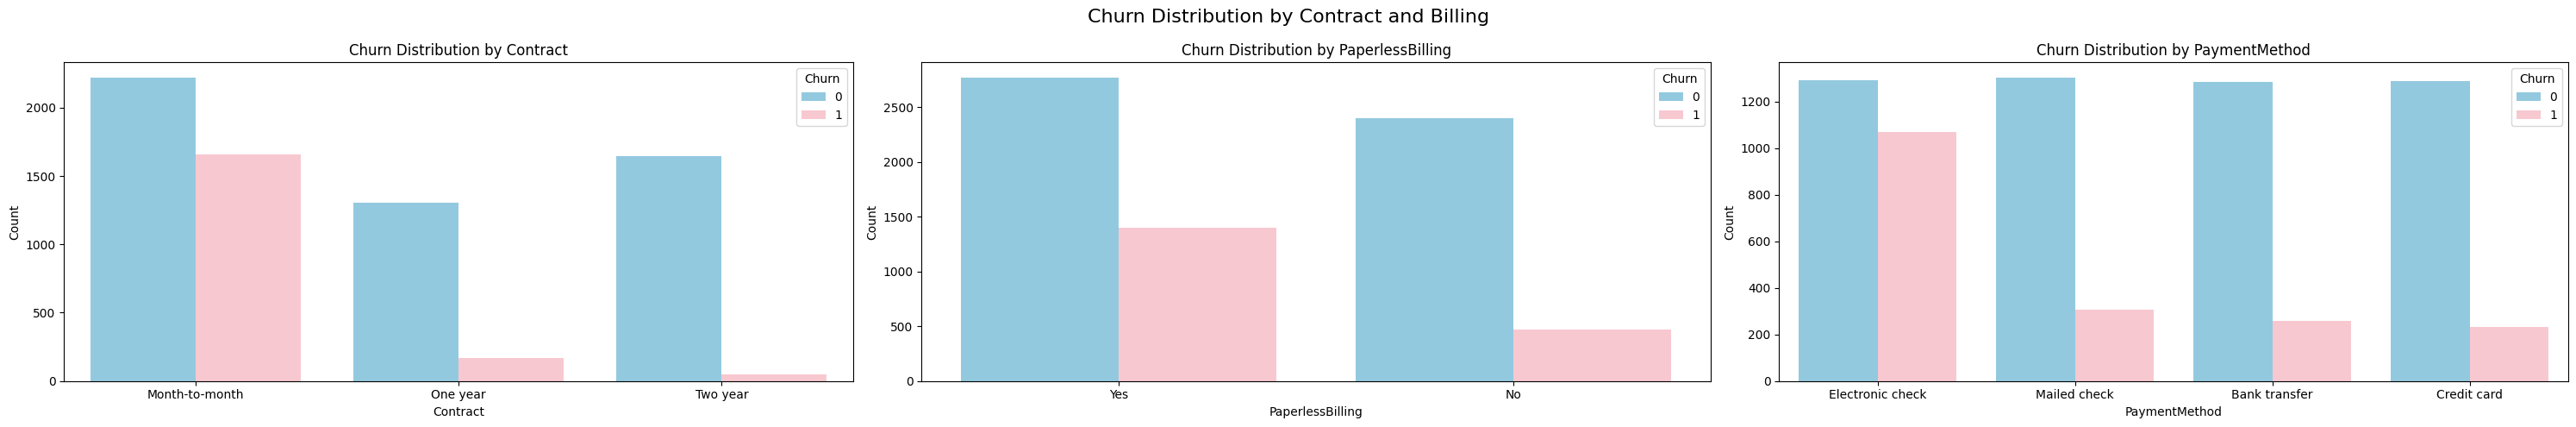

In [31]:
# Mapping for contract and billing renaming
billing_mapping = {
    'Contract': {0: 'Month-to-month', 1: 'One year', 2: 'Two year'},
    'PaperlessBilling': {0: 'No', 1: 'Yes'},
    'PaymentMethod': {
        0: 'Electronic check',
        1: 'Mailed check',
        2: 'Bank transfer',
        3: 'Credit card'
    }
}

# Billing variables
billing_variables = ['Contract', 'PaperlessBilling', 'PaymentMethod']

# Subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 5))
fig.suptitle('Churn Distribution by Contract and Billing', fontsize=16)

# Loop through each billing variable and plot churn distribution
for i, billing_var in enumerate(billing_variables):
    ax = axes[i]

    # Rename billing categories using mapping
    df_billing = df.replace({billing_var: billing_mapping[billing_var]})

    sns.countplot(x=billing_var, hue='Churn', data=df_billing, palette={'skyblue', 'pink'}, ax=ax)
    ax.set_title(f'Churn Distribution by {billing_var}')
    ax.set_xlabel(billing_var)
    ax.set_ylabel('Count')
    ax.legend(title='Churn', loc='upper right')

    # Churn rate
    churn_rate = (df.groupby(billing_var)['Churn'].value_counts(normalize=True) * 100).unstack().round(2)
    churn_rate = churn_rate.rename(columns={0: 'Churn No (%)', 1: 'Churn Yes (%)'})
    print(f"\nChurn Rate by {billing_var}:")
    print(churn_rate)

plt.tight_layout()
plt.show()


## Impact on revenue

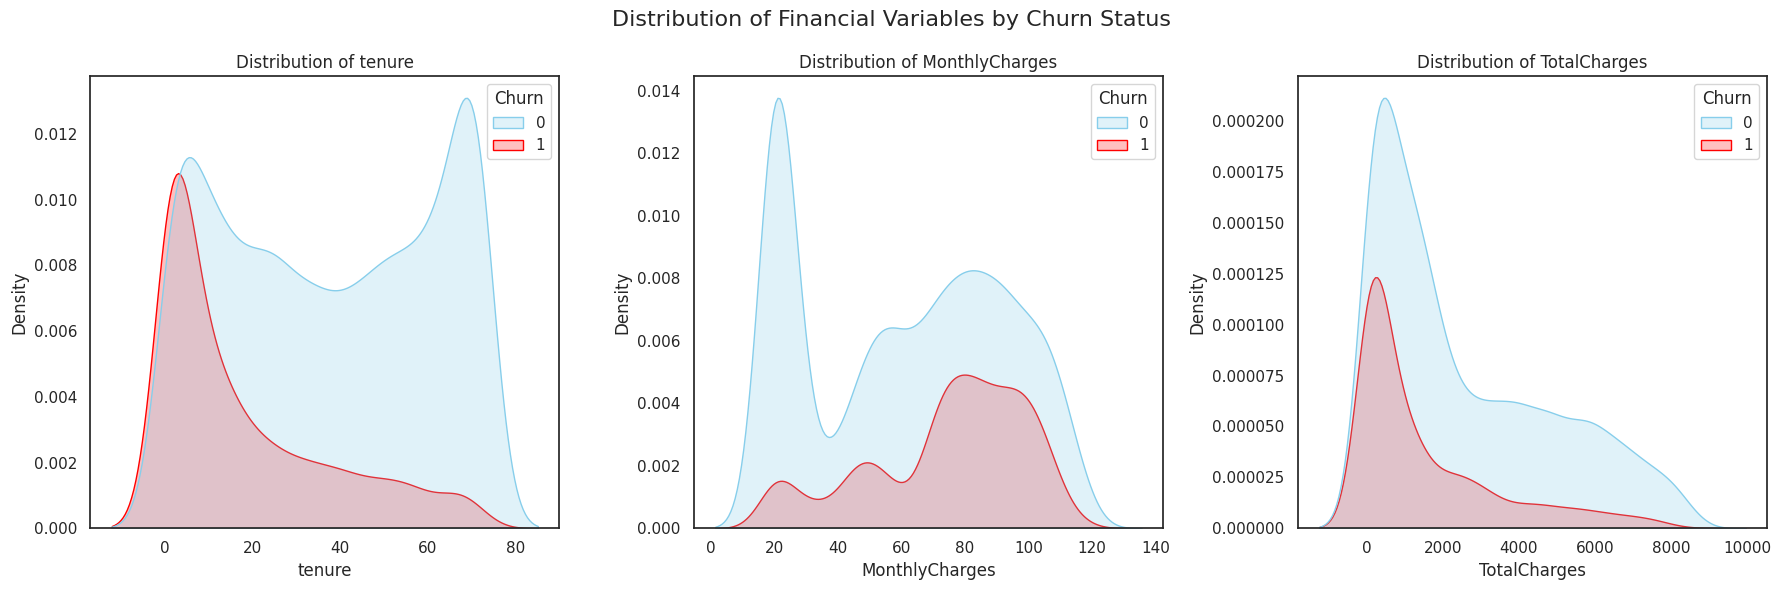

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables for financial variables
financial_variables = ['tenure', 'MonthlyCharges', 'TotalCharges']

# subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.suptitle('Distribution of Financial Variables by Churn Status', fontsize=16)

# Loop through each financial variable and plot KDE distribution by churn status
for i, var in enumerate(financial_variables):
    ax = axes[i]
    sns.kdeplot(data=df, x=var, hue='Churn', ax=ax, fill=True, palette={0: 'skyblue', 1: 'red'})
    ax.set_title(f'Distribution of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()


In [101]:
# Average churn rate for financial variables
average_churn_rates_financial = {}

# Financial variables to consider
financial_variables = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Loop through each financial variable
for variable in financial_variables:
    churn_rates_financial = df.groupby('Churn')[variable].mean()
    average_churn_rates_financial[variable] = round(churn_rates_financial.mean(), 2)

# Printing avg. churn rates
for variable, churn_rate in average_churn_rates_financial.items():
    print(f"Average churn rate for {variable}: {churn_rate}")

Average churn rate for tenure: 27.81
Average churn rate for MonthlyCharges: 67.87
Average churn rate for TotalCharges: 2043.57


In [33]:
# Extract unique values from the 'Churn' column
unique_churn_values = df['Churn'].unique()
unique_churn_values

array([0, 1])

In [34]:
# Churned customers
churned_customers = df[df['Churn'] == 1]

# Remaining customers
remaining_customers = df[df['Churn'] == 0]

# Total monthly charges for all customers
total_monthly_charges_all = df['MonthlyCharges'].sum()

# Total monthly charges of remaining customers
total_monthly_charges_remaining_customers = df[df['Churn'] == 0]['MonthlyCharges'].sum()

# Monthly charges lost
monthly_charges_lost = total_monthly_charges_all - total_monthly_charges_remaining_customers

# Total charges for all customers
total_charges_all = df['TotalCharges'].sum()

# Total charges of remaining customers
total_charges_remaining_customers = df[df['Churn'] == 0]['TotalCharges'].sum()

# Total charges lost
total_charges_lost = total_charges_all - total_charges_remaining_customers

# output
data = {
    "Category": ["Churned Customers", "Remaining Customers", "Total Monthly Charges (All Customers)",
                 "Total Monthly Charges (Remaining Customers)", "Monthly Charges Lost due to Churn",
                 "Total Charges (All Customers)", "Total Charges (Remaining Customers)", "Total Charges Lost due to Churn"],
    "Value": [len(churned_customers), len(remaining_customers), total_monthly_charges_all,
              total_monthly_charges_remaining_customers, monthly_charges_lost, total_charges_all,
              total_charges_remaining_customers, total_charges_lost]
}


output_df = pd.DataFrame(data)
print(output_df)


                                      Category        Value
0                            Churned Customers      1869.00
1                          Remaining Customers      5174.00
2        Total Monthly Charges (All Customers)    456116.60
3  Total Monthly Charges (Remaining Customers)    316985.75
4            Monthly Charges Lost due to Churn    139130.85
5                Total Charges (All Customers)  16056168.70
6          Total Charges (Remaining Customers)  13193241.80
7              Total Charges Lost due to Churn   2862926.90


# Demographic Analysis:

**Objective:**

a) Explore and understand the relationship between churn and the following demographic variables:

    i) Gender

    ii)  Senior Citizen status

    iii) Partner status

    iv) Dependents status

b) Calculate churn rates for each demographic category.

c) Visualize the distribution of churn within each demographic group.

d) Identify patterns in churn behavior based on demographic attributes.

e) Assess whether certain demographics are more prone to churn.

f) Document key findings that will help in Tailoring marketing or retention strategies based on demographic insights.

#### a) Gender

Gender Count:
Male      3555
Female    3488
Name: gender, dtype: int64
Gender Percentage:
gender
Female    49.52
Male      50.48
dtype: float64


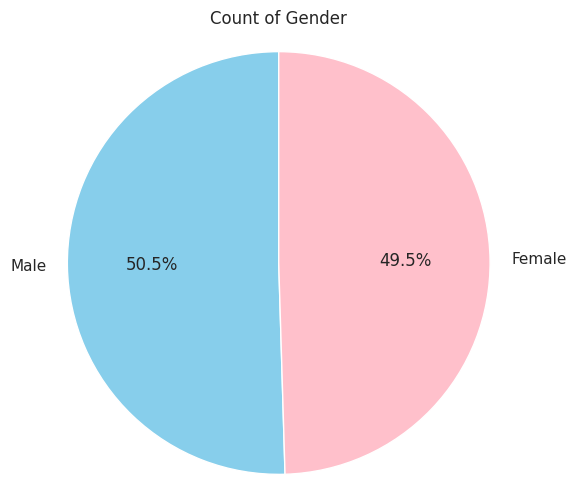

In [35]:

                  #Count and percentage of each gender type

gender_count = df['gender'].value_counts()

print("Gender Count:")

print(gender_count)


gender_stats = df.groupby('gender').size()

gender_percentage = (gender_stats / gender_stats.sum() * 100).round(2)

print("Gender Percentage:")

print(gender_percentage)

plt.figure(figsize=(6, 6))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'])
plt.title('Count of Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

In [36]:
# Gender Churn rates

gender_churn = df.groupby('gender')['Churn'].value_counts(normalize=True).unstack() * 100

gender_churn = gender_churn.round(2)

print("Gender Churn Rate:")
print(gender_churn)


Gender Churn Rate:
Churn       0      1
gender              
Female  73.08  26.92
Male    73.84  26.16


Tabular Output:
Churn      0    1
gender           
Female  2549  939
Male    2625  930


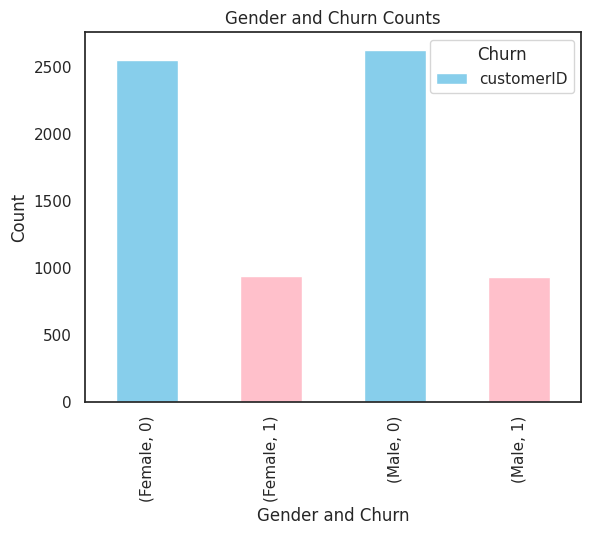

In [37]:
         # Encoding of Gender(Male = 0 Female = 1)
                      # Churn (No = 0, yes = 1)

# Grouping and counting occurrences for each combination (churn distribution) in 'gender' and 'Churn'

gender_churn = df.groupby(['gender', 'Churn']).customerID.count()

print("Tabular Output:")

print(gender_churn.unstack())

# Plotting graph

gender_churn.plot(kind='bar', stacked=True, color=['skyblue', 'pink'])

plt.title('Gender and Churn Counts')

plt.xlabel('Gender and Churn')

plt.ylabel('Count')

plt.legend(title='Churn')

plt.show()


In [38]:
# Calculating churn rates by gender
gender_churn_rate = df.groupby(['gender', 'Churn']).size().unstack()
gender_churn_rate = gender_churn_rate.div(gender_churn_rate.sum(axis=1), axis=0) * 100
gender_churn_rate = gender_churn_rate.round(2)

# Grouping by gender and calculating the average MonthlyCharges
average_monthly_charges_gender = df.groupby('gender')['MonthlyCharges'].mean().round(2)

# Grouping by gender and calculating the average TotalCharges
average_total_charges_gender = df.groupby('gender')['TotalCharges'].mean().round(2)

# Adding the average monthly charges as a new row to the churn rate tabular output
gender_churn_rate['Average Monthly Charges'] = average_monthly_charges_gender


# Adding the average monthly charges as a new row to the churn rate tabular output
gender_churn_rate['Average Total Charges'] = average_total_charges_gender

# Renaming gender labels for better interpretation
gender_churn_rate.index = ['Male', 'Female']


# Renaming gender labels for better interpretation
gender_churn_rate.index = ['Male', 'Female']


print("Churn Rate Tabular Output:")


gender_churn_rate


Churn Rate Tabular Output:


Churn,0,1,Average Monthly Charges,Average Total Charges
Male,73.08,26.92,65.20,2283.19
Female,73.84,26.16,64.33,2283.41


#### b) Senior Citizen

Senior Citizen Count with Percentage and Churn Rate:
              Count  Percentage  Churn Rate (%)
Young People   5901       83.79           23.61
Old People     1142       16.21           41.68


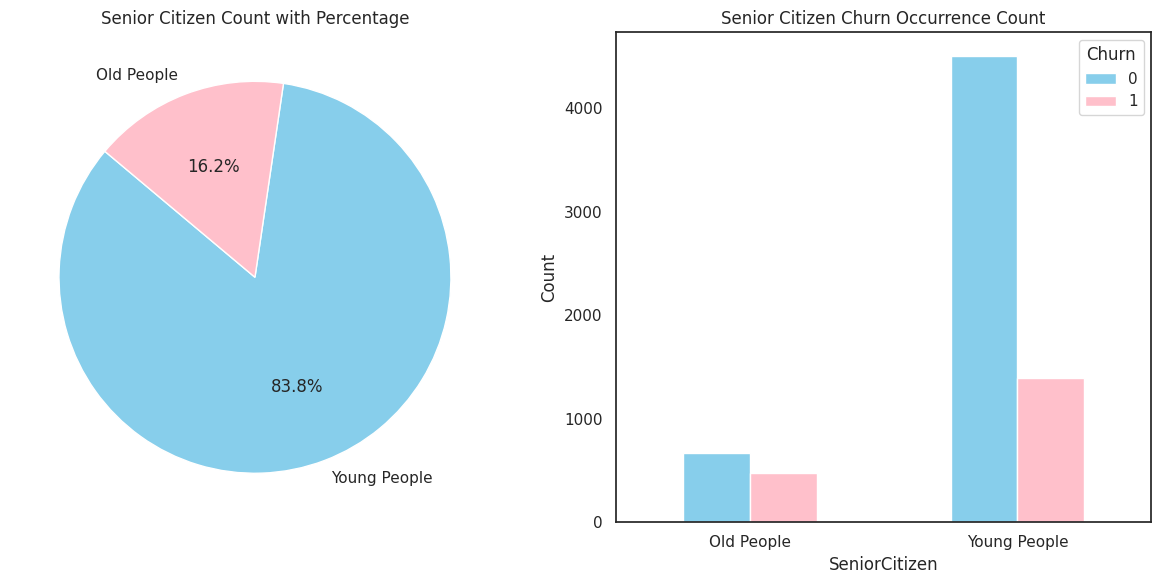

In [39]:
# Grouping data by SeniorCitizen and Churn
senior_churn = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# Reshaping the data for calculating churn rates
senior_churn_rate = senior_churn.div(senior_churn.sum(axis=1), axis=0) * 100

# Rounding the churn rates to two decimal places
senior_churn_rate = senior_churn_rate.round(2)

# Senior Citizen counts
senior_count = df['SeniorCitizen'].value_counts()

# Senior Citizen percentage
senior_percentage = (senior_count / senior_count.sum() * 100).round(2)

# Adding Senior Citizen Percentage as a new row to the Senior Citizen Count tabular output
senior_count_with_percentage = pd.concat([senior_count, senior_percentage], axis=1)
senior_count_with_percentage.columns = ['Count', 'Percentage']

# Adding churn rate to the Senior Citizen Count with Percentage
senior_count_with_percentage['Churn Rate (%)'] = senior_churn_rate[1]

print("Senior Citizen Count with Percentage and Churn Rate:")
print(senior_count_with_percentage)


# colors
colors = ['skyblue', 'pink']

# Creating a figure and axis objects
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for Senior Citizen Count with Percentage
axs[0].pie(senior_count_with_percentage['Count'], labels=senior_count_with_percentage.index, autopct='%1.1f%%', startangle=140, colors=colors)
axs[0].set_title('Senior Citizen Count with Percentage')

# Combo chart for Senior Citizen Churn Occurrence Count and Churn Rate
senior_churn.plot(kind='bar', ax=axs[1], rot=0, color=colors)
axs[1].set_ylabel('Count')
axs[1].set_title('Senior Citizen Churn Occurrence Count')
axs[1].grid(False)

plt.tight_layout()
plt.show()


In [40]:
# Calculating churn rates by SeniorCitizen
SeniorCitizen_churn_rate = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
SeniorCitizen_churn_rate = SeniorCitizen_churn_rate.div(SeniorCitizen_churn_rate.sum(axis=1), axis=0) * 100
SeniorCitizen_churn_rate = SeniorCitizen_churn_rate.round(2)

# Grouping by SeniorCitizen and calculating the average MonthlyCharges
average_monthly_charges_SeniorCitizen = df.groupby('SeniorCitizen')['MonthlyCharges'].mean().round(2)

# Grouping by SeniorCitizen and calculating the average TotalCharges
average_total_charges_SeniorCitizen = df.groupby('SeniorCitizen')['TotalCharges'].mean().round(2)

# Adding the average monthly charges as a new row to the churn rate tabular output
SeniorCitizen_churn_rate['Average Monthly Charges'] = average_monthly_charges_SeniorCitizen

# Adding the average monthly charges as a new row to the churn rate tabular output
SeniorCitizen_churn_rate['Average Total Charges'] = average_total_charges_SeniorCitizen

# Calculate the average tenure by SeniorCitizen
average_tenure_SeniorCitizen = df.groupby('SeniorCitizen')['tenure'].mean().round(2)

# Adding the average tenure as a new row to the churn rate tabular output
SeniorCitizen_churn_rate['Average Tenure'] = average_tenure_SeniorCitizen

# binary values with descriptive labels
SeniorCitizen_churn_rate.index = ['Young People', 'Old People']

print("Age group Vs Financial:")
SeniorCitizen_churn_rate


Age group Vs Financial:


Churn,0,1,Average Monthly Charges,Average Total Charges,Average Tenure
Young People,58.32,41.68,79.82,2810.47,33.30
Old People,76.39,23.61,61.85,2181.09,32.19


In [41]:

# Replacing binary values with descriptive labels for 'SeniorCitizen', 'Contract', Payment Method and 'PaperlessBilling'

df['SeniorCitizen'] = df['SeniorCitizen'].replace({0: 'Young People', 1: 'Old People'})
df['Contract'] = df['Contract'].replace({0: 'Month-to-month', 1: 'One year', 2: 'Two year'})
df['PaperlessBilling'] = df['PaperlessBilling'].replace({0: 'No', 1: 'Yes'})
df['PaymentMethod'] = df['PaymentMethod'].replace({0: 'Electronic Check',
                                                   1: 'Mailed Check',
                                                   2: 'Bank Transfer (Automatic)',
                                                   3: 'Credit Card (Automatic)'})


         # Calculating occurrences for each combination in Senior Citizen column

# 'SeniorCitizen' and 'Contract'

senior_contract_counts = df.groupby(['SeniorCitizen', 'Contract']).size().unstack(fill_value=0)

# 'SeniorCitizen' and 'PaperlessBilling'

senior_paperlessbilling_counts = df.groupby(['SeniorCitizen', 'PaperlessBilling']).size().unstack(fill_value=0)

# 'SeniorCitizen' and 'PaymentMethod'

senior_paymentmethod_counts = df.groupby(['SeniorCitizen', 'PaymentMethod']).size().unstack(fill_value=0)

# Count of SeniorCitizen for Old and Young People

senior_citizen_counts = df['SeniorCitizen'].value_counts()

             # Adding diffrent Count as a new column to the Senior Citizen and Contract tabular output

# Adding Senior Citizen Count

senior_contract_counts['Senior Citizen Count'] = senior_citizen_counts

# Adding PaperlessBilling Count

paperless_billing_counts = df.groupby('SeniorCitizen')['PaperlessBilling'].value_counts().unstack(fill_value=0)
senior_contract_counts['PaperlessBilling No'] = paperless_billing_counts['No']
senior_contract_counts['PaperlessBilling Yes'] = paperless_billing_counts['Yes']

# Adding PaymentMethod Count

paymentmethod_counts = df.groupby('SeniorCitizen')['PaymentMethod'].value_counts().unstack(fill_value=0)
for method in paymentmethod_counts.columns:
    senior_contract_counts[f'{method}'] = paymentmethod_counts[method]

# Total for each column

column_totals = senior_contract_counts.sum()

# Appending total as a new column

senior_contract_counts.loc['Total'] = column_totals

# Rearranging output columns


senior_contract_counts = senior_contract_counts[['Senior Citizen Count',
                                                 'Month-to-month', 'One year', 'Two year',
                                                 'PaperlessBilling No', 'PaperlessBilling Yes',
                                                 'Bank Transfer (Automatic)', 'Credit Card (Automatic)',
                                                 'Electronic Check', 'Mailed Check']]

print("Age group Vs Contract & Billing:")

senior_contract_counts


Age group Vs Contract & Billing:


Contract,Senior Citizen Count,Month-to-month,One year,Two year,PaperlessBilling No,PaperlessBilling Yes,Bank Transfer (Automatic),Credit Card (Automatic),Electronic Check,Mailed Check
SeniorCitizen,,,,,,,,,,
Old People,1142,807,190,145,266,876,233,221,594,94
Young People,5901,3068,1283,1550,2606,3295,1311,1301,1771,1518
Total,7043,3875,1473,1695,2872,4171,1544,1522,2365,1612


In [67]:

# Replace binary values with descriptive labels for 'SeniorCitizen', 'Contract', and 'PaperlessBilling'
df['SeniorCitizen'] = df['SeniorCitizen'].replace({0: 'Young People', 1: 'Old People'})
df['gender'] = df['gender'].replace({0: 'Male', 1: 'Female'})
df['Dependents'] = df['Dependents'].replace({0: 'Without Dependents', 1: 'With Dependents'})

df['Partner'] = df['Partner'].replace({0: 'Without Partner', 1: 'With Partner'})


# Counting occurrences for each combination of 'SeniorCitizen' and 'gender'
senior_gender_counts = df.groupby(['SeniorCitizen', 'gender']).size().unstack(fill_value=0)

# Counting occurrences for each combination of 'SeniorCitizen' and 'Dependents'
senior_dependents_counts = df.groupby(['SeniorCitizen', 'Dependents']).size().unstack(fill_value=0)

# Counting occurrences for each combination of 'SeniorCitizen' and 'Partner'
senior_partner_counts = df.groupby(['SeniorCitizen', 'Partner']).size().unstack(fill_value=0)

# Count of SeniorCitizen for Old and Young People
senior_citizen_counts = df['SeniorCitizen'].value_counts()

# Adding Senior Citizen Count as a new column to the Senior Citizen and gender tabular output
senior_gender_counts['Senior Citizen Count'] = senior_citizen_counts

# Adding Dependents Count as a new column to the Senior Citizen and gender tabular output
dependents_counts = df.groupby('SeniorCitizen')['Dependents'].value_counts().unstack(fill_value=0)
senior_gender_counts['Dependents No'] = dependents_counts['Without Dependents']
senior_gender_counts['Dependents Yes'] = dependents_counts['With Dependents']

# Adding Partner Count as new columns to the Senior Citizen and gender tabular output
partner_counts = df.groupby('SeniorCitizen')['Partner'].value_counts().unstack(fill_value=0)
for partner in partner_counts.columns:
    senior_gender_counts[f'{partner}'] = partner_counts[partner]

# Calculate total for each column
column_totals = senior_gender_counts.sum()

# Append a new row for total
senior_gender_counts.loc['Total'] = column_totals

# Rearranging columns to have Senior Citizen Count first
senior_gender_counts = senior_gender_counts[['Senior Citizen Count',
                                             'Male', 'Female',
                                             'Dependents No', 'Dependents Yes',
                                             'With Partner', 'Without Partner']]

# Print the tabular output
print("Age group Vs other Demographic:")
senior_gender_counts


Age group Vs other Demographic:


gender,Senior Citizen Count,Male,Female,Dependents No,Dependents Yes,With Partner,Without Partner
SeniorCitizen,,,,,,,
Old People,1142,574,568,1051,91,573,569
Young People,5890,2975,2915,3882,2008,2820,3070
Total,7032,3549,3483,4933,2099,3393,3639


#### c) Partner

Partner Count with Percentage and Churn Rate:
                 Total Count  Percentage  Churn Rate (%)
Without Partner         3639       51.75           32.98
With Partner            3393       48.25           19.72


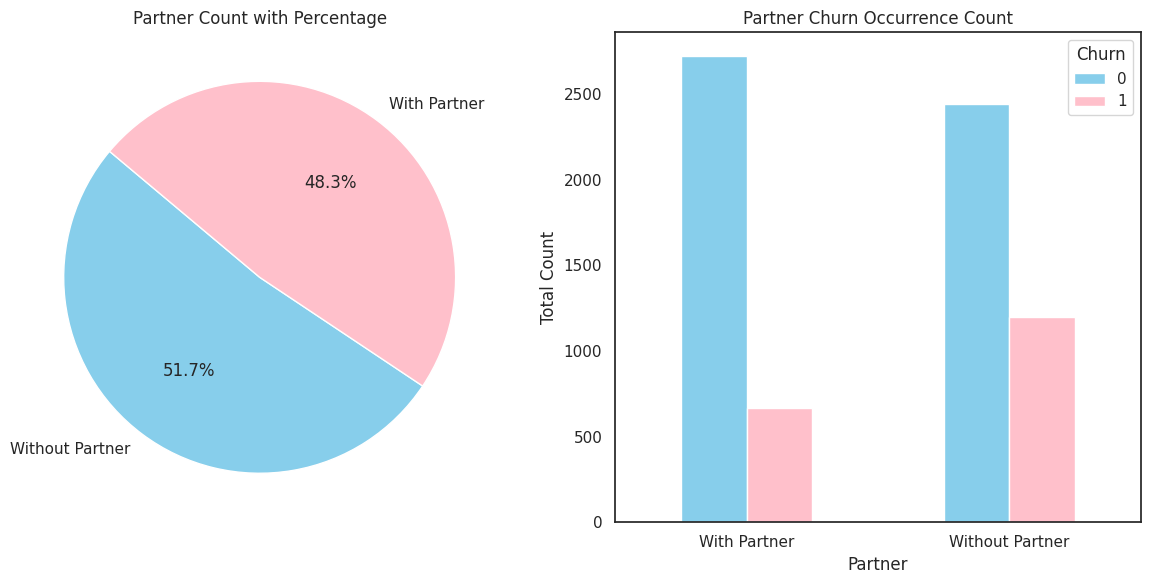

In [68]:
# Grouping data by Partner and Churn

partner_churn = df.groupby(['Partner', 'Churn']).size().unstack()

# Reshaping the data for calculating churn rates

partner_churn_rate = partner_churn.div(partner_churn.sum(axis=1), axis=0) * 100

# Rounding the churn rates to two decimal places

partner_churn_rate = partner_churn_rate.round(2)

# Partner counts

partner_count = df['Partner'].value_counts()

# Partner percentage

partner_percentage = (partner_count / partner_count.sum() * 100).round(2)

# Adding Partner Percentage as a new row to the Partner Count tabular output

partner_count_with_percentage = pd.concat([partner_count, partner_percentage], axis=1)
partner_count_with_percentage.columns = ['Total Count', 'Percentage']

# Adding churn rate to the Partner Count with Percentage

partner_count_with_percentage['Churn Rate (%)'] = partner_churn_rate[1]


# Replace binary values with descriptive labels
partner_count_with_percentage.index = ['Without Partner', 'With Partner']


print("Partner Count with Percentage and Churn Rate:")

print(partner_count_with_percentage)


# colors
colors = ['skyblue', 'pink']

# Creating a figure and axis objects

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for Partner Count with Percentage

axs[0].pie(partner_count_with_percentage['Total Count'], labels=partner_count_with_percentage.index, autopct='%1.1f%%', startangle=140, colors=colors)
axs[0].set_title('Partner Count with Percentage')

# Combo chart for Partner Churn Occurrence Count and Churn Rate

partner_churn.plot(kind='bar', ax=axs[1], rot=0, color=colors)
axs[1].set_ylabel('Total Count')
axs[1].set_title('Partner Churn Occurrence Count')
axs[1].grid(False)


plt.tight_layout()
plt.show()


In [69]:
# Calculating churn rates by Partner
Partner_churn_rate = df.groupby(['Partner', 'Churn']).size().unstack()
Partner_churn_rate = Partner_churn_rate.div(Partner_churn_rate.sum(axis=1), axis=0) * 100
Partner_churn_rate = Partner_churn_rate.round(2)

# Grouping by Partner and calculating the average MonthlyCharges
average_monthly_charges_Partner = df.groupby('Partner')['MonthlyCharges'].mean().round(2)

# Grouping by Partner and calculating the average TotalCharges
average_total_charges_Partner = df.groupby('Partner')['TotalCharges'].mean().round(2)

# Adding the average monthly charges as a new row to the churn rate tabular output
Partner_churn_rate['Average Monthly Charges'] = average_monthly_charges_Partner

# Adding the average monthly charges as a new row to the churn rate tabular output
Partner_churn_rate['Average Total Charges'] = average_total_charges_Partner

# Calculate the average tenure by Partner
average_tenure_Partner = df.groupby('Partner')['tenure'].mean().round(2)

# Adding the average tenure as a new row to the churn rate tabular output
Partner_churn_rate['Average Tenure'] = average_tenure_Partner


# Grouping by Partner and calculating the average PaperlessBilling
average_paperless_billing_Partner = df.groupby('Partner')['PaperlessBilling'].mean().round(2)

# Adding the average PaperlessBilling as a new row to the churn rate tabular output
Partner_churn_rate['Average PaperlessBilling'] = average_paperless_billing_Partner

# Replace binary values with descriptive labels
Partner_churn_rate.index = ['Without Partner', 'With Partner']

print("Partner Vs Financials:")
Partner_churn_rate


Partner Vs Financials:


Churn,0,1,Average Monthly Charges,Average Total Charges,Average Tenure,Average PaperlessBilling
Without Partner,80.28,19.72,67.85,3032.27,42.13,0.59
With Partner,67.02,32.98,61.96,1584.96,23.37,0.60


In [70]:
# Replace binary values with descriptive labels for 'Partner', 'Contract', and 'PaperlessBilling'

df['Partner'] = df['Partner'].replace({0: 'Without Partner', 1: 'With Partner'})
df['Contract'] = df['Contract'].replace({0: 'Month-to-month', 1: 'One year', 2: 'Two year'})
df['PaymentMethod'] = df['PaymentMethod'].replace({0: 'Electronic Check',
                                                   1: 'Mailed Check',
                                                   2: 'Bank Transfer (Automatic)',
                                                   3: 'Credit Card (Automatic)'})

# Counting occurrences for each combination of 'Partner' and 'Contract'
partner_contract_counts = df.groupby(['Partner', 'Contract']).size().unstack(fill_value=0)

# Counting occurrences for each combination of 'Partner' and 'PaymentMethod'
partner_paymentmethod_counts = df.groupby(['Partner', 'PaymentMethod']).size().unstack(fill_value=0)

# Count of Partner for With and Without Partner
partner_counts = df['Partner'].value_counts()

# Adding Partner Count as a new column to the Partner and Contract tabular output
partner_contract_counts['Partner Count'] = partner_counts

# Adding PaymentMethod Count as new columns to the Partner and Contract tabular output
paymentmethod_counts = df.groupby('Partner')['PaymentMethod'].value_counts().unstack(fill_value=0)
for method in paymentmethod_counts.columns:
    partner_contract_counts[f'{method}'] = paymentmethod_counts[method]

# Calculate total for each column
column_totals = partner_contract_counts.sum()

# Append a new row for total
partner_contract_counts.loc['Total'] = column_totals

# Rearrange columns to have Partner Count first
partner_contract_counts = partner_contract_counts[['Partner Count',
                                                   'Month-to-month', 'One year', 'Two year',
                                                   'Bank Transfer (Automatic)', 'Credit Card (Automatic)',
                                                   'Electronic Check', 'Mailed Check']]



# Change the index labels from 'Old People' to 'Without Partner' and 'Young People' to 'With Partner'
partner_contract_counts = partner_contract_counts.rename(index={'Old People': 'Without Partner', 'Young People': 'With Partner'})

# Print the tabular output
print("Partner Vs Contract and Billing")
partner_contract_counts

Partner Vs Contract and Billing


Contract,Partner Count,Month-to-month,One year,Two year,Bank Transfer (Automatic),Credit Card (Automatic),Electronic Check,Mailed Check
Partner,,,,,,,,
With Partner,3393,1380,829,1184,906,853,1003,631
Without Partner,3639,2495,643,501,636,668,1362,973
Total,7032,3875,1472,1685,1542,1521,2365,1604


#### d) Dependents

Dependents Count with Percentage and Churn Rate:
                    Total Count  Percentage  Churn Rate (%)
Without Dependents         4933       70.15           31.28
With Dependents            2099       29.85           15.53


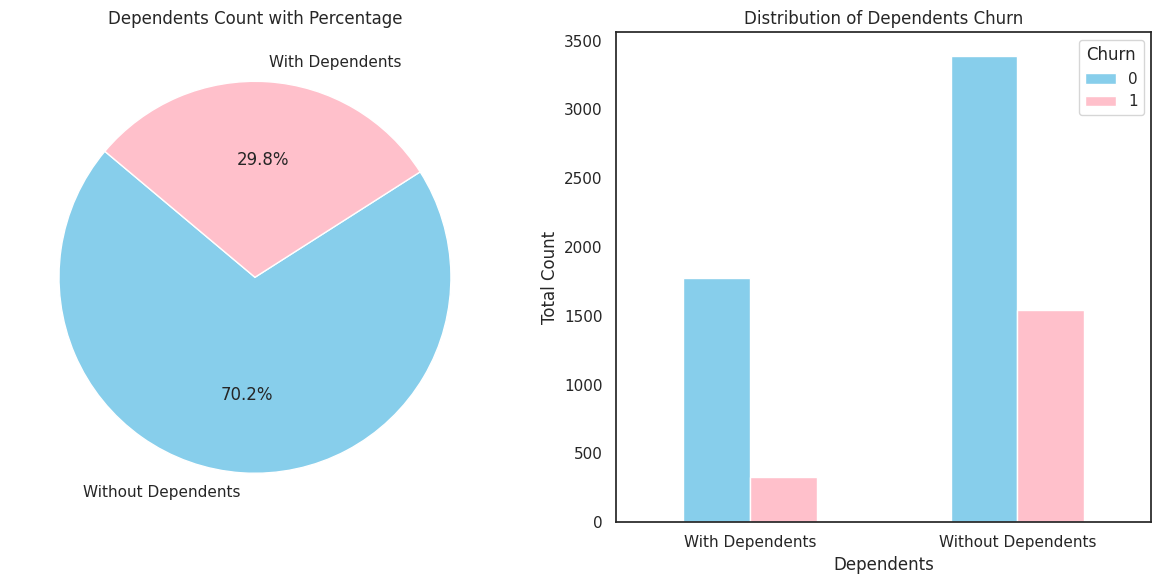

In [71]:
# Grouping data by Dependents and Churn
dependents_churn = df.groupby(['Dependents', 'Churn']).size().unstack()

# Reshaping the data for calculating churn rates
dependents_churn_rate = dependents_churn.div(dependents_churn.sum(axis=1), axis=0) * 100

# Rounding the churn rates to two decimal places
dependents_churn_rate = dependents_churn_rate.round(2)

# Dependents counts
dependents_count = df['Dependents'].value_counts()

# Dependents percentage
dependents_percentage = (dependents_count / dependents_count.sum() * 100).round(2)

# Adding Dependents Percentage as a new row to the Dependents Count tabular output
dependents_count_with_percentage = pd.concat([dependents_count, dependents_percentage], axis=1)
dependents_count_with_percentage.columns = ['Total Count', 'Percentage']

# Adding churn rate to the Dependents Count with Percentage
dependents_count_with_percentage['Churn Rate (%)'] = dependents_churn_rate[1]

# Replace binary values with descriptive labels
dependents_count_with_percentage.index = ['Without Dependents', 'With Dependents']

print("Dependents Count with Percentage and Churn Rate:")
print(dependents_count_with_percentage)

# colors
colors = ['skyblue', 'pink']

# Creating a figure and axis objects
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for Dependents Count with Percentage
axs[0].pie(dependents_count_with_percentage['Total Count'], labels=dependents_count_with_percentage.index, autopct='%1.1f%%', startangle=140, colors=colors)
axs[0].set_title('Dependents Count with Percentage')

# Distribution of Dependents
dependents_churn.plot(kind='bar', ax=axs[1], rot=0, color=colors)
axs[1].set_ylabel('Total Count')
axs[1].set_title('Distribution of Dependents Churn')
axs[1].grid(False)


plt.tight_layout()
plt.show()


In [72]:
# Calculating churn rates by Dependents
Dependents_churn_rate = df.groupby(['Dependents', 'Churn']).size().unstack()
Dependents_churn_rate = Dependents_churn_rate.div(Dependents_churn_rate.sum(axis=1), axis=0) * 100
Dependents_churn_rate = Dependents_churn_rate.round(2)

# Grouping by Dependents and calculating the average MonthlyCharges
average_monthly_charges_Dependents = df.groupby('Dependents')['MonthlyCharges'].mean().round(2)

# Grouping by Dependents and calculating the average TotalCharges
average_total_charges_Dependents = df.groupby('Dependents')['TotalCharges'].mean().round(2)

# Adding the average monthly charges as a new row to the churn rate tabular output
Dependents_churn_rate['Average Monthly Charges'] = average_monthly_charges_Dependents

# Adding the average monthly charges as a new row to the churn rate tabular output
Dependents_churn_rate['Average Total Charges'] = average_total_charges_Dependents

# Calculate the average tenure by Dependents
average_tenure_Dependents = df.groupby('Dependents')['tenure'].mean().round(2)

# Adding the average tenure as a new row to the churn rate tabular output
Dependents_churn_rate['Average Tenure'] = average_tenure_Dependents

# Grouping by Dependents and calculating the average PaperlessBilling
average_paperless_billing_Dependents = df.groupby('Dependents')['PaperlessBilling'].mean().round(2)

# Adding the average PaperlessBilling as a new row to the churn rate tabular output
Dependents_churn_rate['Average PaperlessBilling'] = average_paperless_billing_Dependents

# Replace binary values with descriptive labels
Dependents_churn_rate.index = ['Without Dependents', 'With Dependents']

print("Dependents Vs Financial:")
Dependents_churn_rate


Dependents Vs Financial:


Churn,0,1,Average Monthly Charges,Average Total Charges,Average Tenure,Average PaperlessBilling
Without Dependents,84.47,15.53,59.62,2507.96,38.57,0.51
With Dependents,68.72,31.28,67.00,2187.71,29.81,0.63


In [73]:
# Replace binary values with descriptive labels for 'Dependents', 'Contract', and 'PaperlessBilling'
df['Dependents'] = df['Dependents'].replace({0: 'Without Dependents', 1: 'With Dependents'})
df['Contract'] = df['Contract'].replace({0: 'Month-to-month', 1: 'One year', 2: 'Two year'})
df['PaymentMethod'] = df['PaymentMethod'].replace({0: 'Electronic Check',
                                                   1: 'Mailed Check',
                                                   2: 'Bank Transfer (Automatic)',
                                                   3: 'Credit Card (Automatic)'})

# Counting occurrences for each combination of 'Dependents' and 'Contract'
dependents_contract_counts = df.groupby(['Dependents', 'Contract']).size().unstack(fill_value=0)

# Counting occurrences for each combination of 'Dependents' and 'PaymentMethod'
dependents_paymentmethod_counts = df.groupby(['Dependents', 'PaymentMethod']).size().unstack(fill_value=0)

# Count of Dependents for With and Without Dependents
dependents_counts = df['Dependents'].value_counts()

# Adding Dependents Count as a new column to the Dependents and Contract tabular output
dependents_contract_counts['Dependents Count'] = dependents_counts

# Adding PaymentMethod Count as new columns to the Dependents and Contract tabular output
paymentmethod_counts = df.groupby('Dependents')['PaymentMethod'].value_counts().unstack(fill_value=0)
for method in paymentmethod_counts.columns:
    dependents_contract_counts[f'{method}'] = paymentmethod_counts[method]

# Calculate total for each column
column_totals = dependents_contract_counts.sum()

# Append a new row for total
dependents_contract_counts.loc['Total'] = column_totals

# Rearrange columns to have Dependents Count first
dependents_contract_counts = dependents_contract_counts[['Dependents Count',
                                                         'Month-to-month', 'One year', 'Two year',
                                                         'Bank Transfer (Automatic)', 'Credit Card (Automatic)',
                                                         'Electronic Check', 'Mailed Check']]

# Change the index labels from 'Old People' to 'Without Dependents' and 'Young People' to 'With Dependents'
dependents_contract_counts = dependents_contract_counts.rename(index={'Old People': 'Without Dependents', 'Young People': 'With Dependents'})

# Print the tabular output
print("Dependents Vs Contract & Billing:")
dependents_contract_counts


Dependents Vs Contract & Billing:


Contract,Dependents Count,Month-to-month,One year,Two year,Bank Transfer (Automatic),Credit Card (Automatic),Electronic Check,Mailed Check
Dependents,,,,,,,,
With Dependents,2099,789,530,780,530,535,479,555
Without Dependents,4933,3086,942,905,1012,986,1886,1049
Total,7032,3875,1472,1685,1542,1521,2365,1604


# **Services Provided**

## Popular service among demographic

In [74]:
                   # Services offered

services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies']

            # Grouping data by the count occurrences of each service

# gender

service_counts_gender = df.groupby('gender')[services].sum()

# SeniorCitizen

service_counts_senior_citizen = df.groupby('SeniorCitizen')[services].sum()

# Partner

service_counts_partner = df.groupby('Partner')[services].sum()

# Dependents

service_counts_dependents = df.groupby('Dependents')[services].sum()


                # Most popular service among diffrent demographic

# gender

most_popular_services_gender = service_counts_gender.idxmax(axis=1)


# SeniorCitizens
most_popular_services_senior_citizen = service_counts_senior_citizen.idxmax(axis=1)


# partners

most_popular_services_partner = service_counts_partner.idxmax(axis=1)

# dependents

most_popular_services_dependents = service_counts_dependents.idxmax(axis=1)


print("Most Popular Services Among Partners:")
print(most_popular_services_partner)


print("Most Popular Services Among Dependents:")
print(most_popular_services_dependents)



print("Most Popular Services Among Genders:")
print(most_popular_services_gender)


print("Most Popular Services Among SeniorCitizens:")
print(most_popular_services_senior_citizen)

Most Popular Services Among Partners:
Partner
With Partner       StreamingMovies
Without Partner    StreamingMovies
dtype: object
Most Popular Services Among Dependents:
Dependents
With Dependents           StreamingTV
Without Dependents    StreamingMovies
dtype: object
Most Popular Services Among Genders:
gender
Female    StreamingMovies
Male      StreamingMovies
dtype: object
Most Popular Services Among SeniorCitizens:
SeniorCitizen
Old People      StreamingMovies
Young People    StreamingMovies
dtype: object


## Unique observations

In [75]:

# Services Provided

services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', "PhoneService",
            "MultipleLines", "InternetService"]

# Unique observations for each service

for service in services:
    unique_obs = df[service].unique()
    print(f"Unique observations for {service}: {unique_obs}")


Unique observations for OnlineSecurity: [0 1 2]
Unique observations for OnlineBackup: [1 0 2]
Unique observations for DeviceProtection: [0 1 2]
Unique observations for TechSupport: [0 1 2]
Unique observations for StreamingTV: [0 1 2]
Unique observations for StreamingMovies: [0 1 2]
Unique observations for PhoneService: [0 1]
Unique observations for MultipleLines: [0 1 2]
Unique observations for InternetService: [0 1 2]


## Customer Distribution of services

In [76]:

# locale library to use commas as thousand separators (currency)

locale.setlocale(locale.LC_ALL, '')

# Formatting the value if it's >= to 1000

def format_value(value):
    if value >= 1000:
        return locale.format_string("%d", value, grouping=True)
    else:
        return value

# Phone Services

phone_customers = len(df[df['PhoneService'] == 1])
no_phone = len(df[df['PhoneService'] == 0])

total_monthly_charges_phone = df[df['PhoneService'] == 1]['MonthlyCharges'].sum()
total_monthly_charges_no_phone = df[df['PhoneService'] == 0]['MonthlyCharges'].sum()

total_charges_phone = df[df['PhoneService'] == 1]['TotalCharges'].sum()
total_charges_no_phone = df[df['PhoneService'] == 0]['TotalCharges'].sum()

# Multiple Lines

multiple_lines_customers = len(df[df['MultipleLines'] != 0])
no_multiple_lines = len(df[df['MultipleLines'] == 0])

total_monthly_charges_multiple_lines = df[df['MultipleLines'] != 0]['MonthlyCharges'].sum()
total_monthly_charges_no_multiple_lines = df[df['MultipleLines'] == 0]['MonthlyCharges'].sum()

total_charges_multiple_lines = df[df['MultipleLines'] != 0]['TotalCharges'].sum()
total_charges_no_multiple_lines = df[df['MultipleLines'] == 0]['TotalCharges'].sum()

# Internet Service

internet_customers = len(df[df['InternetService'] != 2])
no_internet_customers = len(df[df['InternetService'] == 2])

total_monthly_charges_internet = df[df['InternetService'] != 2]['MonthlyCharges'].sum()
total_monthly_charges_no_internet = df[df['InternetService'] == 2]['MonthlyCharges'].sum()

total_charges_internet = df[df['InternetService'] != 2]['TotalCharges'].sum()
total_charges_no_internet = df[df['InternetService'] == 2]['TotalCharges'].sum()

# Online Security

online_security_customers = len(df[df['OnlineSecurity'] == 1])
no_online_security = len(df[df['OnlineSecurity'] != 1])

total_monthly_charges_online_security_customers = df[df['OnlineSecurity'] == 1]['MonthlyCharges'].sum()
total_monthly_charges_no_online_security = df[df['OnlineSecurity'] != 1]['MonthlyCharges'].sum()

total_charges_online_security_customers = df[df['OnlineSecurity'] == 1]['TotalCharges'].sum()
total_charges_no_online_security = df[df['OnlineSecurity'] != 1]['TotalCharges'].sum()

# Online Backup

online_backup_customers = len(df[df['OnlineBackup'] == 1])
no_online_backup = len(df[df['OnlineBackup'] != 1])

total_monthly_charges_online_backup_customers = df[df['OnlineBackup'] == 1]['MonthlyCharges'].sum()
total_monthly_charges_no_online_backup = df[df['OnlineBackup'] != 1]['MonthlyCharges'].sum()

total_charges_online_backup_customers = df[df['OnlineBackup'] == 1]['TotalCharges'].sum()
total_charges_no_online_backup = df[df['OnlineBackup'] != 1]['TotalCharges'].sum()

# Device Protection

device_protection_customers = len(df[df['DeviceProtection'] == 1])
no_device_protection = len(df[df['DeviceProtection'] != 1])

total_monthly_charges_device_protection_customers = df[df['DeviceProtection'] == 1]['MonthlyCharges'].sum()
total_monthly_charges_no_device_protection = df[df['DeviceProtection'] != 1]['MonthlyCharges'].sum()

total_charges_device_protection_customers = df[df['DeviceProtection'] == 1]['TotalCharges'].sum()
total_charges_no_device_protection = df[df['DeviceProtection'] != 1]['TotalCharges'].sum()

# Tech Support

tech_support_customers = len(df[df['TechSupport'] == 1])
no_tech_support = len(df[df['TechSupport'] != 1])

total_monthly_charges_tech_support_customers = df[df['TechSupport'] == 1]['MonthlyCharges'].sum()
total_monthly_charges_no_tech_support = df[df['TechSupport'] != 1]['MonthlyCharges'].sum()

total_charges_tech_support_customers = df[df['TechSupport'] == 1]['TotalCharges'].sum()
total_charges_no_tech_support = df[df['TechSupport'] != 1]['TotalCharges'].sum()

# Streaming TV

streaming_tv_customers = len(df[df['StreamingTV'] == 1])
no_streaming_tv = len(df[df['StreamingTV'] != 1])

total_monthly_charges_streaming_tv_customers = df[df['StreamingTV'] == 1]['MonthlyCharges'].sum()
total_monthly_charges_no_streaming_tv = df[df['StreamingTV'] != 1]['MonthlyCharges'].sum()

total_charges_streaming_tv_customers = df[df['StreamingTV'] == 1]['TotalCharges'].sum()
total_charges_no_streaming_tv = df[df['StreamingTV'] != 1]['TotalCharges'].sum()

# Streaming Movies

streaming_movies_customers = len(df[df['StreamingMovies'] == 1])
no_streaming_movies = len(df[df['StreamingMovies'] != 1])

total_monthly_charges_streaming_movies_customers = df[df['StreamingMovies'] == 1]['MonthlyCharges'].sum()
total_monthly_charges_no_streaming_movies = df[df['StreamingMovies'] != 1]['MonthlyCharges'].sum()

total_charges_streaming_movies_customers = df[df['StreamingMovies'] == 1]['TotalCharges'].sum()
total_charges_no_streaming_movies = df[df['StreamingMovies'] != 1]['TotalCharges'].sum()

# Output

data = {
    "Category": ["phone_customers", "no_phone", "multiple_lines_customers", "no_multiple_lines", "internet_customers", "no_internet_customers",
                 "online_security_customers", "no_online_security",
                 "online_backup_customers", "no_online_backup",
                 "device_protection_customers", "no_device_protection",
                 "tech_support_customers", "no_tech_support",
                 "streaming_tv_customers", "no_streaming_tv",
                 "streaming_movies_customers", "no_streaming_movies",
                 "total_monthly_charges_phone", "total_monthly_charges_no_phone", "total_charges_phone", "total_charges_no_phone",
                 "total_monthly_charges_multiple_lines", "total_monthly_charges_no_multiple_lines", "total_charges_multiple_lines",
                 "total_charges_no_multiple_lines", "total_monthly_charges_internet", "total_monthly_charges_no_internet",
                 "total_charges_internet", "total_charges_no_internet",
                 "total_monthly_charges_online_security_customers", "total_monthly_charges_no_online_security",
                 "total_charges_online_security_customers", "total_charges_no_online_security",
                 "total_monthly_charges_online_backup_customers", "total_monthly_charges_no_online_backup",
                 "total_charges_online_backup_customers", "total_charges_no_online_backup",
                 "total_monthly_charges_device_protection_customers", "total_monthly_charges_no_device_protection",
                 "total_charges_device_protection_customers", "total_charges_no_device_protection",
                 "total_monthly_charges_tech_support_customers", "total_monthly_charges_no_tech_support",
                 "total_charges_tech_support_customers", "total_charges_no_tech_support",
                 "total_monthly_charges_streaming_tv_customers", "total_monthly_charges_no_streaming_tv",
                 "total_charges_streaming_tv_customers", "total_charges_no_streaming_tv",
                 "total_monthly_charges_streaming_movies_customers", "total_monthly_charges_no_streaming_movies",
                 "total_charges_streaming_movies_customers", "total_charges_no_streaming_movies"],
    "Value": [phone_customers, no_phone, multiple_lines_customers, no_multiple_lines, internet_customers, no_internet_customers,
              online_security_customers, no_online_security,
              online_backup_customers, no_online_backup,
              device_protection_customers, no_device_protection,
              tech_support_customers, no_tech_support,
              streaming_tv_customers, no_streaming_tv,
              streaming_movies_customers, no_streaming_movies,
              format_value(total_monthly_charges_phone), format_value(total_monthly_charges_no_phone), format_value(total_charges_phone), format_value(total_charges_no_phone),
              format_value(total_monthly_charges_multiple_lines), format_value(total_monthly_charges_no_multiple_lines), format_value(total_charges_multiple_lines),
              format_value(total_charges_no_multiple_lines), format_value(total_monthly_charges_internet), format_value(total_monthly_charges_no_internet),
              format_value(total_charges_internet), format_value(total_charges_no_internet),
              format_value(total_monthly_charges_online_security_customers), format_value(total_monthly_charges_no_online_security),
              format_value(total_charges_online_security_customers), format_value(total_charges_no_online_security),
              format_value(total_monthly_charges_online_backup_customers), format_value(total_monthly_charges_no_online_backup),
              format_value(total_charges_online_backup_customers), format_value(total_charges_no_online_backup),
              format_value(total_monthly_charges_device_protection_customers), format_value(total_monthly_charges_no_device_protection),
              format_value(total_charges_device_protection_customers), format_value(total_charges_no_device_protection),
              format_value(total_monthly_charges_tech_support_customers), format_value(total_monthly_charges_no_tech_support),
              format_value(total_charges_tech_support_customers), format_value(total_charges_no_tech_support),
              format_value(total_monthly_charges_streaming_tv_customers), format_value(total_monthly_charges_no_streaming_tv),
              format_value(total_charges_streaming_tv_customers), format_value(total_charges_no_streaming_tv),
              format_value(total_monthly_charges_streaming_movies_customers), format_value(total_monthly_charges_no_streaming_movies),
              format_value(total_charges_streaming_movies_customers), format_value(total_charges_no_streaming_movies)]
}

output_df = pd.DataFrame(data)
output_df


,Category,Value
0,phone_customers,6352
1,no_phone,680
2,multiple_lines_customers,6352
3,no_multiple_lines,680
4,internet_customers,5512
5,no_internet_customers,1520
6,online_security_customers,2015
7,no_online_security,5017
8,online_backup_customers,2425
9,no_online_backup,4607


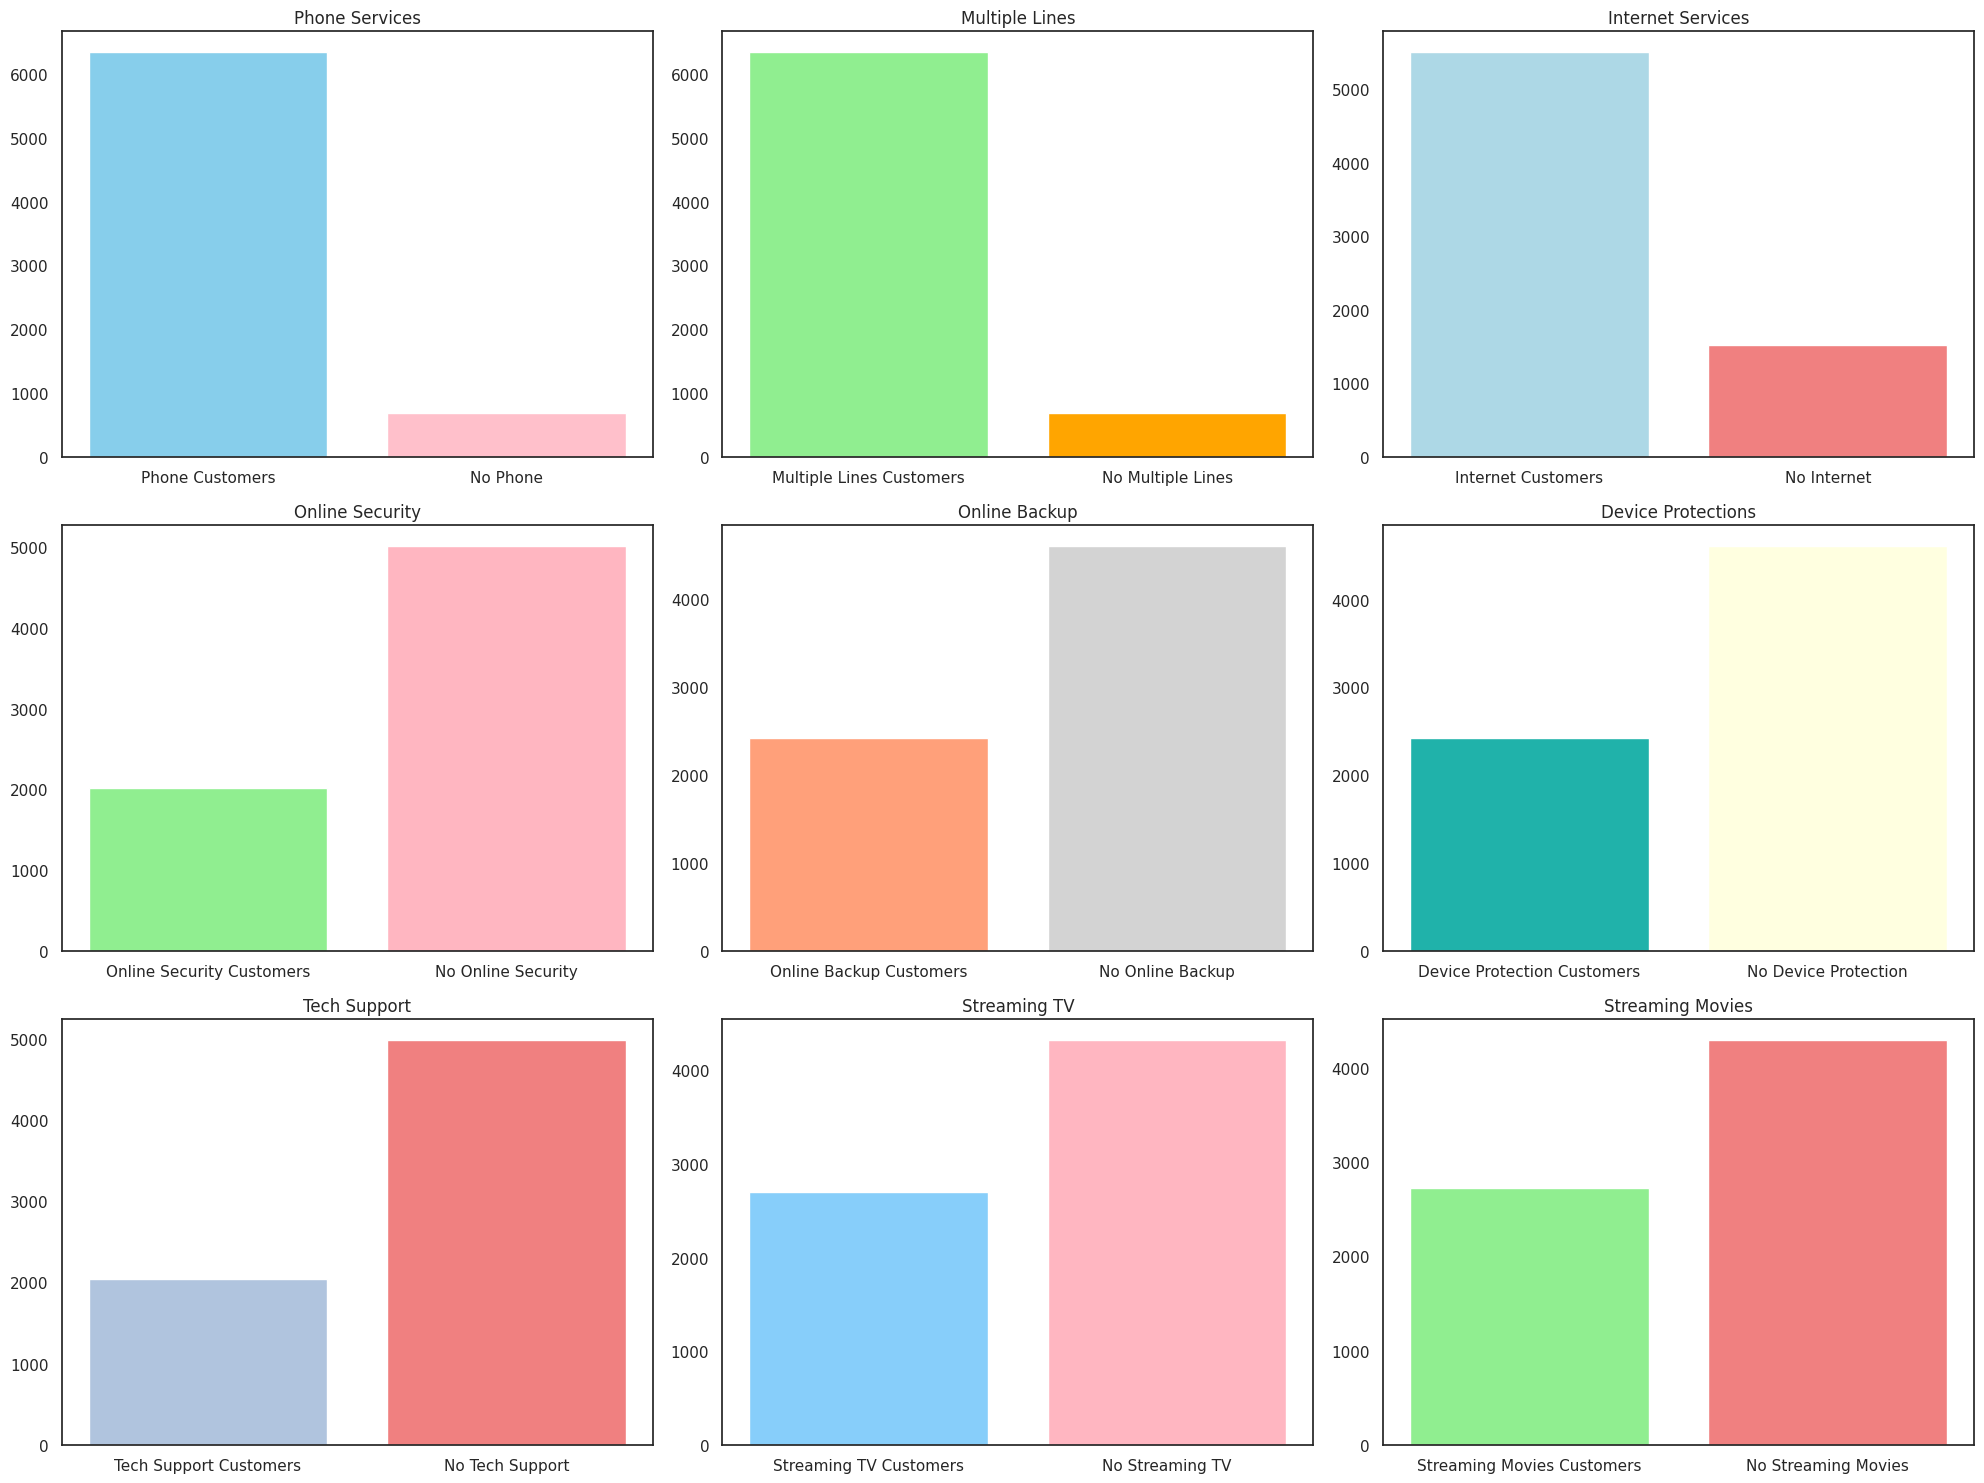

In [77]:
# Services

categories_phone = ['Phone Customers', 'No Phone']
values_phone = [phone_customers, no_phone]
colors_phone = ['skyblue', 'pink']

categories_multiple_lines = ['Multiple Lines Customers', 'No Multiple Lines']
values_multiple_lines = [multiple_lines_customers, no_multiple_lines]
colors_multiple_lines = ['lightgreen', 'orange']


categories_internet = ['Internet Customers', 'No Internet']
values_internet = [internet_customers, no_internet_customers]
colors_internet = ['lightblue', 'lightcoral']

categories_security = ['Online Security Customers', 'No Online Security']
values_security = [online_security_customers, no_online_security]
colors_security = ['lightgreen', 'lightpink']

categories_backup = ['Online Backup Customers', 'No Online Backup']
values_backup = [online_backup_customers, no_online_backup]
colors_backup = ['lightsalmon', 'lightgray']

categories_protection = ['Device Protection Customers', 'No Device Protection']
values_protection = [device_protection_customers, no_device_protection]
colors_protection = ['lightseagreen', 'lightyellow']

categories_tech_support = ['Tech Support Customers', 'No Tech Support']
values_tech_support = [tech_support_customers, no_tech_support]
colors_tech_support = ['lightsteelblue', 'lightcoral']

categories_streaming_tv = ['Streaming TV Customers', 'No Streaming TV']
values_streaming_tv = [streaming_tv_customers, no_streaming_tv]
colors_streaming_tv = ['lightskyblue', 'lightpink']

categories_streaming_movies = ['Streaming Movies Customers', 'No Streaming Movies']
values_streaming_movies = [streaming_movies_customers, no_streaming_movies]
colors_streaming_movies = ['lightgreen', 'lightcoral']

# Plotting
plt.figure(figsize=(20, 15))

# Subplot 1
plt.subplot(3, 3, 1)
plt.bar(categories_phone, values_phone, color=colors_phone)
plt.title('Phone Services')

# Subplot 2
plt.subplot(3, 3, 2)
plt.bar(categories_multiple_lines, values_multiple_lines, color=colors_multiple_lines)
plt.title('Multiple Lines')

# Subplot 3
plt.subplot(3, 3, 3)
plt.bar(categories_internet, values_internet, color=colors_internet)
plt.title('Internet Services')

# Subplot 4
plt.subplot(3, 3, 4)
plt.bar(categories_security, values_security, color=colors_security)
plt.title('Online Security')

# Subplot 5
plt.subplot(3, 3, 5)
plt.bar(categories_backup, values_backup, color=colors_backup)
plt.title('Online Backup')

# Subplot 6
plt.subplot(3, 3, 6)
plt.bar(categories_protection, values_protection, color=colors_protection)
plt.title('Device Protections')

# Subplot 7
plt.subplot(3, 3, 7)
plt.bar(categories_tech_support, values_tech_support, color=colors_tech_support)
plt.title('Tech Support')

# Subplot 8
plt.subplot(3, 3, 8)
plt.bar(categories_streaming_tv, values_streaming_tv, color=colors_streaming_tv)
plt.title('Streaming TV')

# Subplot 9
plt.subplot(3, 3, 9)
plt.bar(categories_streaming_movies, values_streaming_movies, color=colors_streaming_movies)
plt.title('Streaming Movies')

plt.tight_layout()
plt.show()

## Services Revenue Analysis

## Tenure

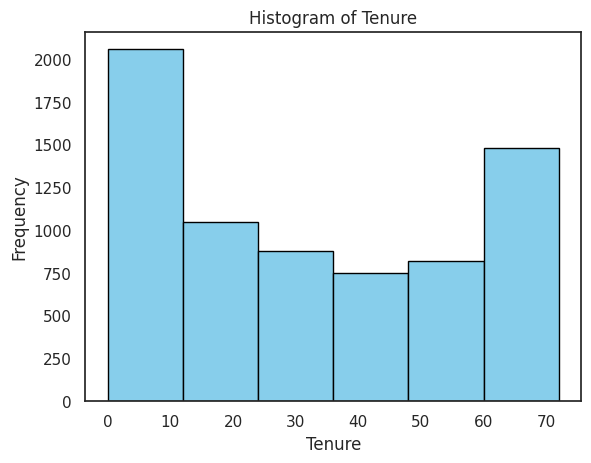

Bin 0: 2058 observations
Bin 1: 1047 observations
Bin 2: 876 observations
Bin 3: 748 observations
Bin 4: 820 observations
Bin 5: 1483 observations


In [80]:

bin_edges = range(0, 73, 12)  # Bin edges from 0 to 72 with bin width of 12

# Histogram counts
hist_counts, _ = np.histogram(df['tenure'], bins=bin_edges)

# Histogram
plt.hist(df['tenure'], bins=bin_edges, color='skyblue', edgecolor='black')

# labels and title
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Histogram of Tenure')

plt.show()

# count of each bin

for i, count in enumerate(hist_counts):
    print(f"Bin {i}: {count} observations")



# **Observations / Findings**



## **Demographic:**




**i) Gender**
  
    There's a relatively balanced distribution between male and female customers.
    
    The average partner, dependent, and senior citizen rates are nearly identical between genders, further suggesting a balanced distribution across demographic segments.

    The similarity in churn rates, along with comparable demographic averages, suggests that the marketing campaign is well-rounded and does not show bias toward either gender.

**ii) Senior Citizen**

    Senior citizens represent 16.2% of the customer base and demonstrate higher churn rates (41.68%) and spending patterns as they might be they might be subscribing to higher-tier services or additional featurescompared to young people.
   
    The average tenure for Old People (33.30 months) is slightly higher than that of Young People (32.19 months).

    Young People have a significantly higher count of month-to-month contracts compared to Old People.

    Old People seem to opt for longer-term contracts (One Year, Two Year) more frequently than Young People.

    Paperless Billing is more popular among Young People.

    Most common Mode of payment across both groups is Electonic Check, however, it's frequently used by Young People.

    Bank Transfer (Automatic) and Mailed Check are less popular payment methods among both Old and Young People.

    More customers in both age groups do not have dependents.
    
    Old People show a slightly higher tendency to have partners compared to Young People.

**iii) Partner**

    Customers with partners are more likely to stay with the service provider for a longer duration Compared to those without partners who tend to churn more.

    Customers with partners have higher average monthly charges ($67.78) and total charges ($3032.27) compared to those without partners ($61.95 and $1584.96, respectively).

    Customers with partners have a longer average tenure (42.02 months) compared to those without partners (23.36 months).

    Customers with partners (40%) opt for month-to-month contracts compared to one-year (830) and two-year (1192) contracts.
    
    In contrast, customers without partners have a higher proportion opting for month-to-month contracts (2495) compared to longer-term contracts.

**iv) Dependents**

    Customers with dependents exhibit a lower churn rate (15.45%) compared to those without dependents (31.28%).

    Customers with dependents have a lower average monthly charge ($59.52) compared to those without dependents ($67.00). However, they have higher average total charges ($2507.96) and average tenure (38.37 months) compared to customers without dependents ($2187.71 and 29.81 months, respectively).

    Majority of Customers without dependents show a higher preference for month-to-month contracts (3086) compared to longer-term contracts.


## **Churn Summary**

    The overall churn rate among the entire customers is 26.54%.
    
    To provide help to telco companies, it's important to understand the churn rates for different demographoc group and services in order to prioritize areas for improvement and develop targeted strategies to enhance customer retention and satisfaction.


**Correlation Analysis (linear relationship between churn and each variable).**

    Churn variable Positively correlates with:
        - MonthlyCharges: 0.193356
        - PaperlessBilling: 0.191825
        - MultipleLines: 0.036310
        - PhoneService: 0.011942

    Negatively correlates with:
         - InternetService: -0.047291
         - TotalCharges: -0.199484
         - StreamingTV: -0.205742
         - StreamingMovies: -0.207256
         - DeviceProtection: -0.281465
         - OnlineBackup: -0.291449
         - TechSupport: -0.329852
         - OnlineSecurity: -0.332819
         - tenure: -0.352229


**Demographic**
  

    Senior citizens are more likely to churn compared to other demographic groups with an average churn rate of 32.64%.
    
    The churn rates between genders are fairly similar.
    
    Customers without partners have a significantly higher churn rate (32.96%) compared to those with partners (19.66%)
    
    Senior citizens are more likely to churn (41.68%) compared to younger customers (23.61%).
    
    Customers without dependents (31.28%) have a higher churn rate compared to those with dependents (15.45%)


**Services Provided**

    Having a phone service doesn't significantly impact churn because customers with or without  phone service have almost similar churn rate.
    
    Offering multiple lines might not contribute positively to customer retention because customers with multiple lines have a higher churn rate (28.61%) compared to those with single lines (25.04%) or no phone service (24.93%).
    
    The type of internet service used significantly affects churn rates because customers with Fiber Optic internet service have the highest churn rate (41.89%), followed by DSL (18.96%). Customers without internet service have the lowest churn rate (7.40%).
    
    The churn rates for customers subscribing to additional services like Online Security, Online Backup, Device Protection, and Tech Support are significantly lower when compared to those with no internet service.

    Customers are less committed to Streaming TV and Streaming Movies or have alternative options they prefer.

**Contract and Billing**


   
    Customers with longer contract terms (7.05%)exhibits lower churn rates compared to those with  Month-to-month contracts (42.71%).
   
    Customers whose choice of payment is paperless billing are more likely to churn compared to those who prefer other methods.

    Electronic check payments is more prone to churning (45.29%) compared to other payment options.

**Financial**

    Approximately 30.48% of the monthly revenue is forfeited because of customer churn, amounting to about $139,130.85. The cumulative revenue lost from customer churn is $2,862,926.90, corresponding to nearly 17.82% of the total revenue.
    
    Customers are more likely to is churn when the total charges are lower than $2043.57.
  
    As monthly charges rise above $67, there is an increase in customer churn, whereas when charges approach $100, the likelihood of churn decreases.

    Customers with a tenure of fewer than 28 months show a higher likelihood of churning. As the tenure extends, the rate of churn decreases.

# **Factors that may contribute to churning**


  **Financial Stability:**

    Customers with higher purchasing power, such as older demographics and those with partners, tend to opt for higher-tier services and commit to longer contract terms due to their higher disposable income and combined household incomes. This results in higher average monthly charges and total charges for the respective groups.

   **Technology Adoption and Usage:**

    Younger customers' tech-savviness may lead to exploration of alternative service providers, leading to higher utilization of electronic payment methods and paperless billing.

**Contract Preferences:**

    Old People might prefer longer-term contracts for stability and predictability in their expenses, while Young People might prefer flexibility and may be more inclined towards month-to-month contracts.

**Customer Loyalty:**

    Older customers have been with the service provider for a longer duration, leading to higher average tenure and potentially higher churn rates due to changing needs or preferences over time.

  **Family and relationship Stability**

    Customers with partners and those with dependents prioritize stability in their service providers, leading to lower churn rates and longer tenures. Customers with partners benefit from stable living arrangements, while those with dependents prioritize continuity to meet family needs, collectively contributing to reduced churn rates.

  **Financial Planning:**

    Customers with dependents may be more financially prudent, opting for lower-priced service plans to accommodate household budgets while still ensuring essential services for their families.


# **Recomendation**

    1.The balanced churn rates across various demographic groups suggest that there's no immediate requirement for gender-specific adjustments or targeted campaigns.

    2.Developing targeted marketing campaigns and promotions tailored to the specific preferences and priorities of each age group

    3.Offering loyalty programs and referral incentives to encourage long-term customer relationships across all age groups.

    4.Coaching customers to adapt to new technologies especially the older customers who may require more assistance with technology or online billing inquiries.

    5.Seeking constant feedback from customers and continous monitoring of demographic trends to understand their evolving needs and preferences.

    6.Implementing price optimization strategies that balance affordability and value for customers ie those without partners, ensuring competitive pricing while maintaining profitability and service quality.

    7.Developing marketing strategies highlighting family-centric benefits, such as reliability, affordability, and comprehensive service offerings.
    
    8.The company could focus on improving the quality and reliability of the internet offerings to reduce churn given the high churn rates associated with it.

    9.Promoting additional services like Online Security, Online Backup, Device Protection, and Tech Support could improve customer retention.
   
    10.The company to evaluate the value proposition of offering multiple lines and explore whether it aligns with customer needs and expectation considering the higher churn rate associated with it.

    11.Incentivizing longer-term contracts, improving paperless billing experiences, and potentially optimizing payment methods can be used to mitigate churn risk.




# Pre processing

In [82]:
# Dropping Unnecessary columns before modelling

# 'customerID' column
df.drop(columns=['customerID'], inplace=True)

df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,Young People,With Partner,Without Dependents,1,0,0,0,0,1,0,0,0,0,Month-to-month,1,Electronic Check,29.85,29.85,0
1,Male,Young People,Without Partner,Without Dependents,34,1,1,0,1,0,1,0,0,0,One year,0,Mailed Check,56.95,1889.50,0
2,Male,Young People,Without Partner,Without Dependents,2,1,1,0,1,1,0,0,0,0,Month-to-month,1,Mailed Check,53.85,108.15,1
3,Male,Young People,Without Partner,Without Dependents,45,0,0,0,1,0,1,1,0,0,One year,0,Bank Transfer (Automatic),42.30,1840.75,0
4,Female,Young People,Without Partner,Without Dependents,2,1,1,1,0,0,0,0,0,0,Month-to-month,1,Electronic Check,70.70,151.65,1
